# Exploratory Data Analysis

In [1]:
!python --version

Python 3.11.9


In [2]:
!pip install matplotlib
!pip install seaborn
!pip install spicy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 13.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/8.0 MB 17.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.0 MB 18

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

In [3]:
# Load the dataset
df = pd.read_csv("data/Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,+1-240-2997,Gift,customer2148@bank.com
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,Luxury,7833.088780,Web,TX,Android,0,USD,+1-641-1940,Payment,customer8393@bank.com
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,+1-685-4317,Subscription,customer8594@bank.com
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,+1-650-5207,Subscription,customer1396@bank.com
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,Electronics,4877.511195,Web,PA,Linux,0,CAD,+1-995-5816,Gift,customer1126@bank.com


In [6]:
df.shape

(200000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [8]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,48.469710,105.032620,4995.865781,0.070000
std,17.896964,210.894961,1990.914559,0.255148
min,18.000000,5.000000,0.000000,0.000000
25%,33.000000,31.508303,3646.620917,0.000000
50%,48.000000,52.831014,4987.400530,0.000000
75%,64.000000,75.871259,6343.998115,0.000000
max,79.000000,1897.869419,13631.898149,1.000000


In [11]:
df['Is_Fraud'].value_counts(normalize=True) * 100  # Check fraud percentage

Is_Fraud
0    93.0
1     7.0
Name: proportion, dtype: float64

The fraud distribution shows that 7% of transactions are fraudulent, while 93% are non-fraudulent. This indicates a significant class imbalance, which may affect the model’s ability to detect fraudulent transactions accurately.

In [12]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])

def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Transaction_Time'] = df['Transaction_Time'].apply(categorize_time)

C:\Users\Palvi\AppData\Local\Temp\ipykernel_24204\2493909172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [14]:
df['Transaction_Time'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [16]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_year'] = df['Transaction_Date'].dt.year
df['Transaction_month'] = df['Transaction_Date'].dt.month_name()
df['Transaction_day'] = df['Transaction_Date'].dt.day_name()

# Univariate Analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Transaction_Date'}>],
       [<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Account_Balance'}>],
       [<Axes: title={'center': 'Is_Fraud'}>,
        <Axes: title={'center': 'Transaction_year'}>]], dtype=object)

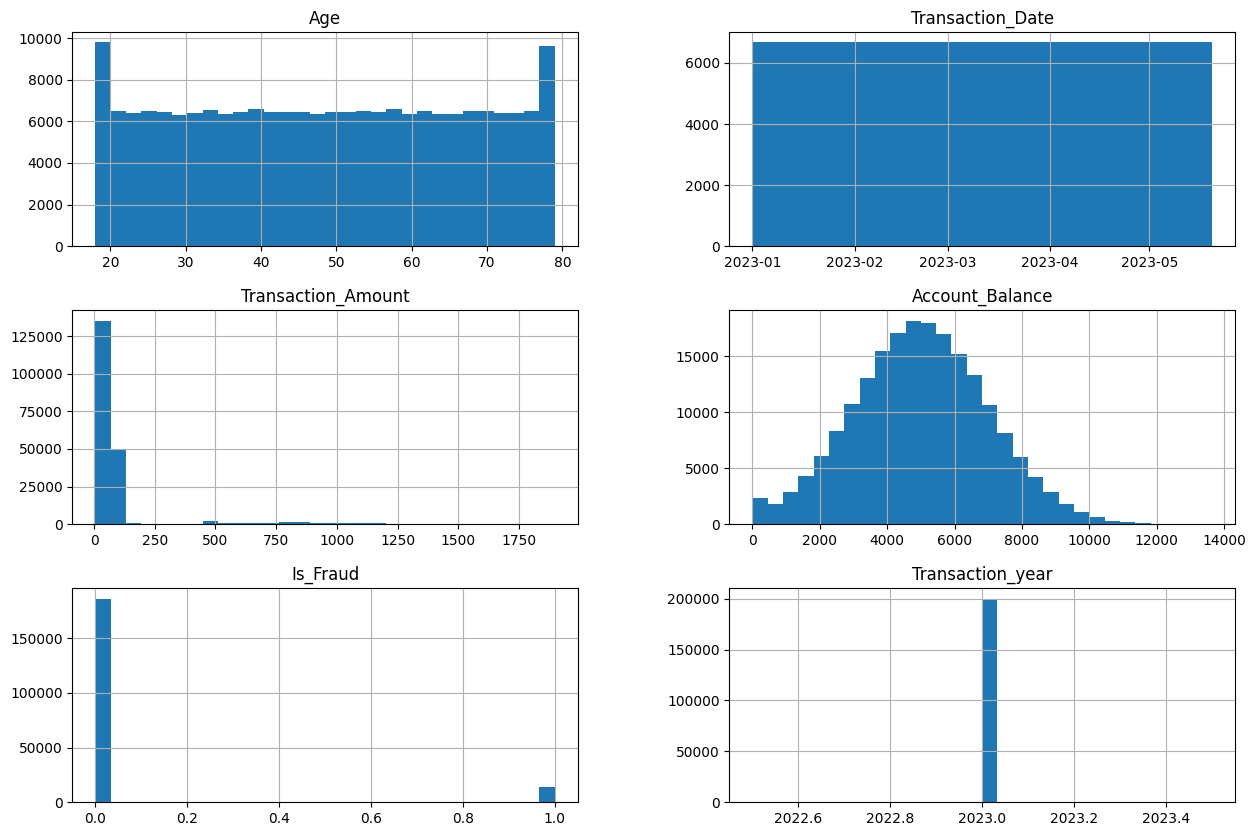

In [17]:
df.hist(figsize=(15, 10), bins=30)

- Age: The distribution is relatively uniform, with spikes at the lower and upper age ranges.
- Transaction Date: Transactions are evenly spread over the recorded time period.
- Transaction Amount: Most transactions are of low amounts, with a heavy right skew indicating a few high-value transactions.
- Account Balance: The distribution is approximately normal, with most balances centered around the middle range.
- Is Fraud: The dataset is highly imbalanced, with significantly more non-fraudulent transactions than fraudulent ones.
- Transaction Year: Most transactions occur within a single year, suggesting a limited time frame for the dataset.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

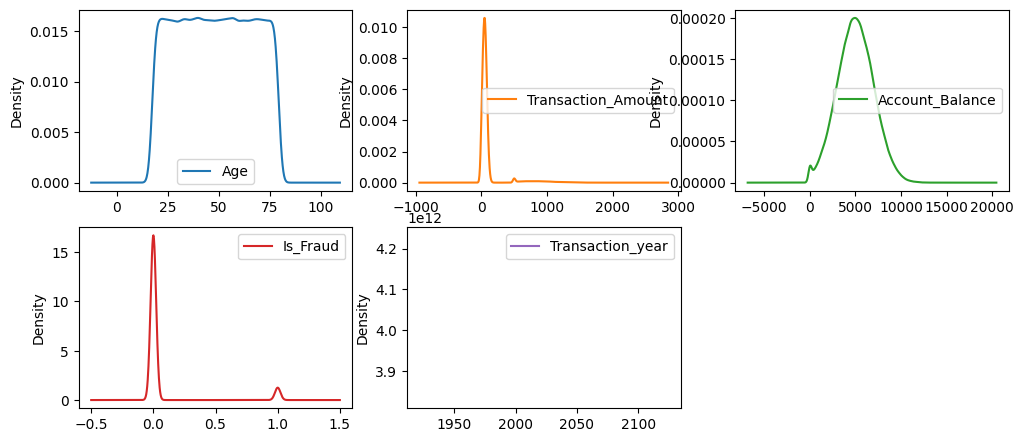

In [19]:
df.select_dtypes(include=['number']).plot(kind='density', subplots=True, layout=(3,3), figsize=(12,8), sharex=False)

<Axes: ylabel='count'>

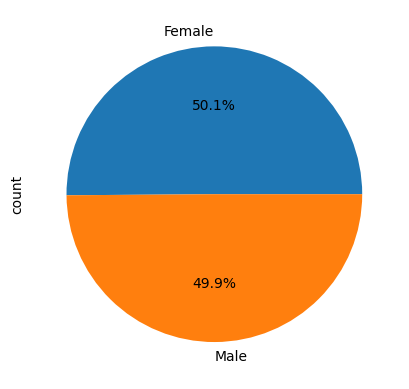

In [20]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

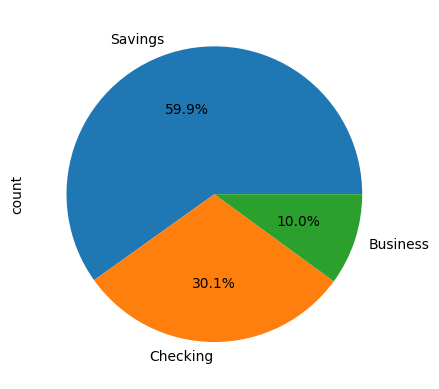

In [21]:
df["Account_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

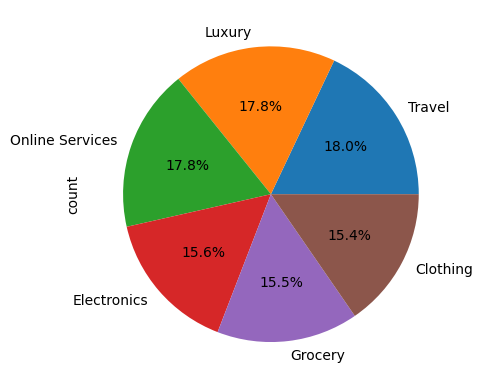

In [22]:
df["Merchant_Category"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

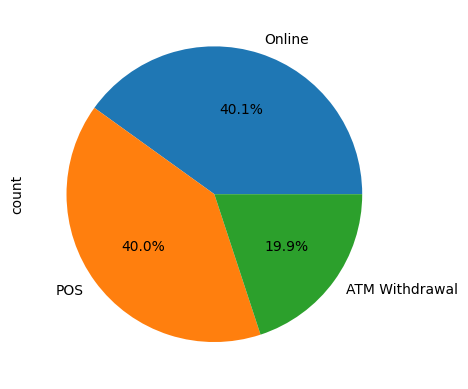

In [23]:
df["Transaction_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

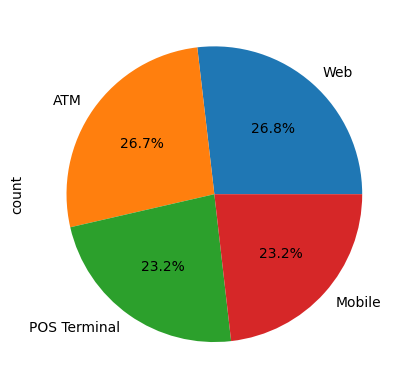

In [24]:
df["Transaction_Device"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

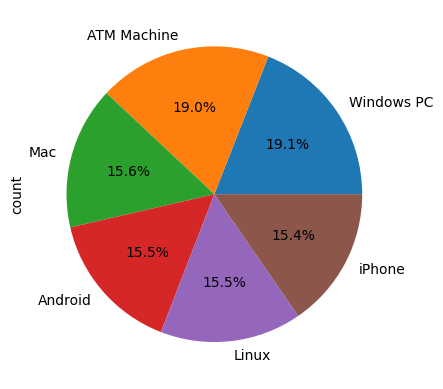

In [25]:
df["Device_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

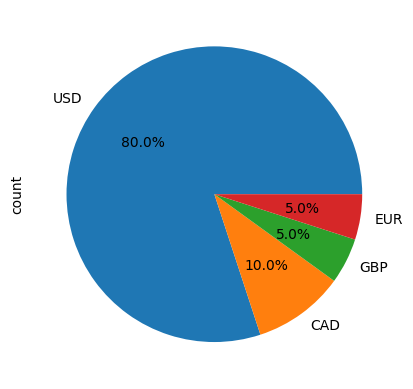

In [26]:
df["Transaction_Currency"].value_counts().plot.pie(autopct="%1.1f%%") 

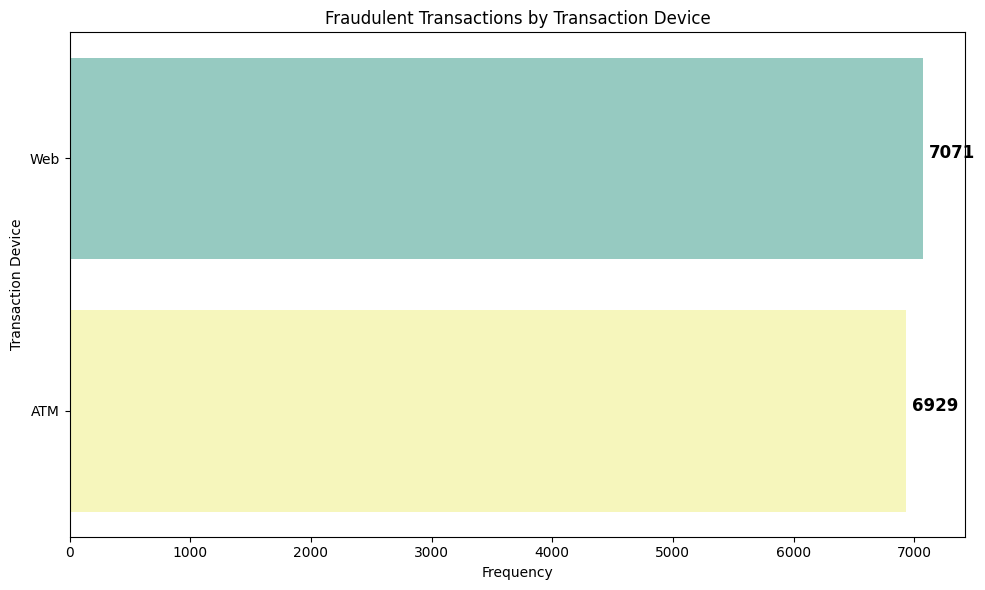

In [30]:
fraud_df = df[df['Is_Fraud'] == 1]
fraud_counts = fraud_df['Transaction_Device'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="Set3", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Device")
plt.title("Fraudulent Transactions by Transaction Device")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


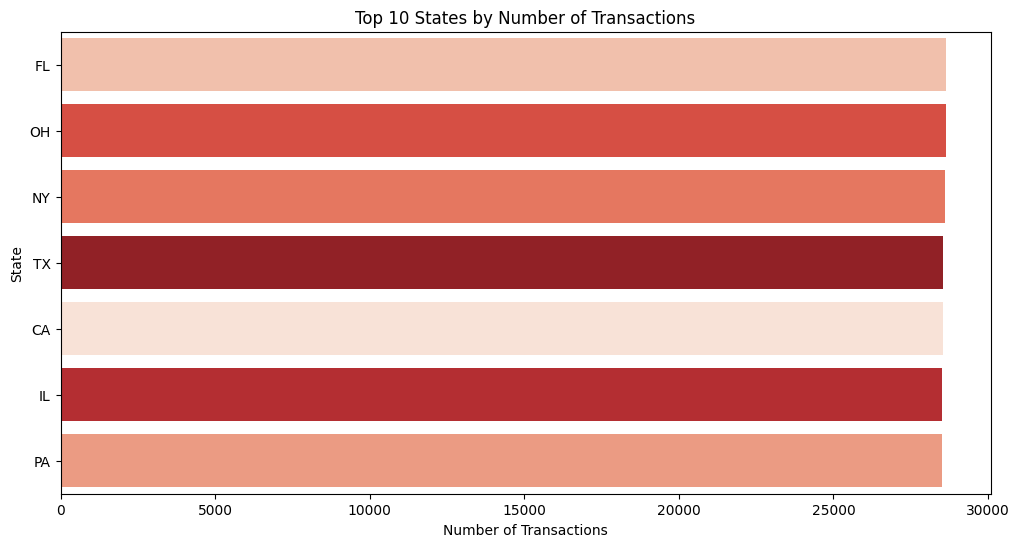

In [33]:
# Transactions by State
plt.figure(figsize=(12, 6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index[:10], hue = df['State'], palette='Reds', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
plt.show()

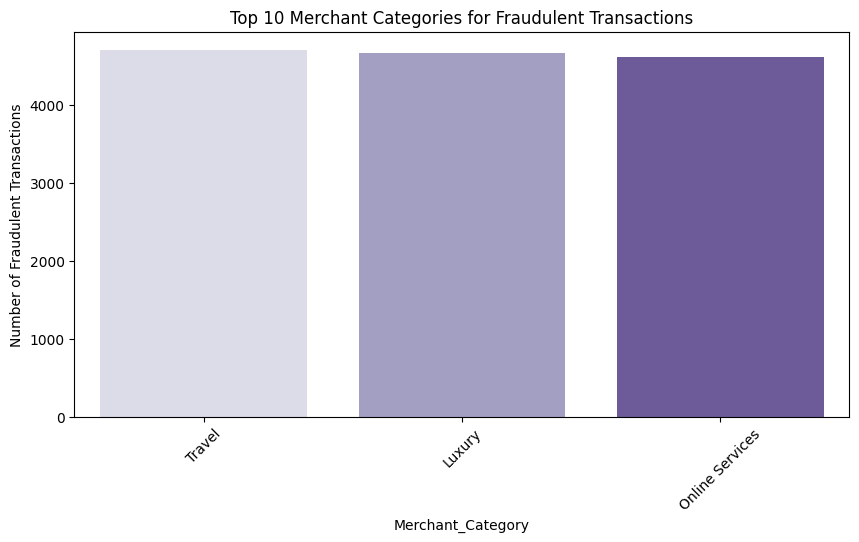

In [39]:
# Fraud by merchant category
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_merchant.index, y=fraud_merchant.values, hue =fraud_merchant.index, palette = "Purples", legend=False)
plt.title("Top 10 Merchant Categories for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

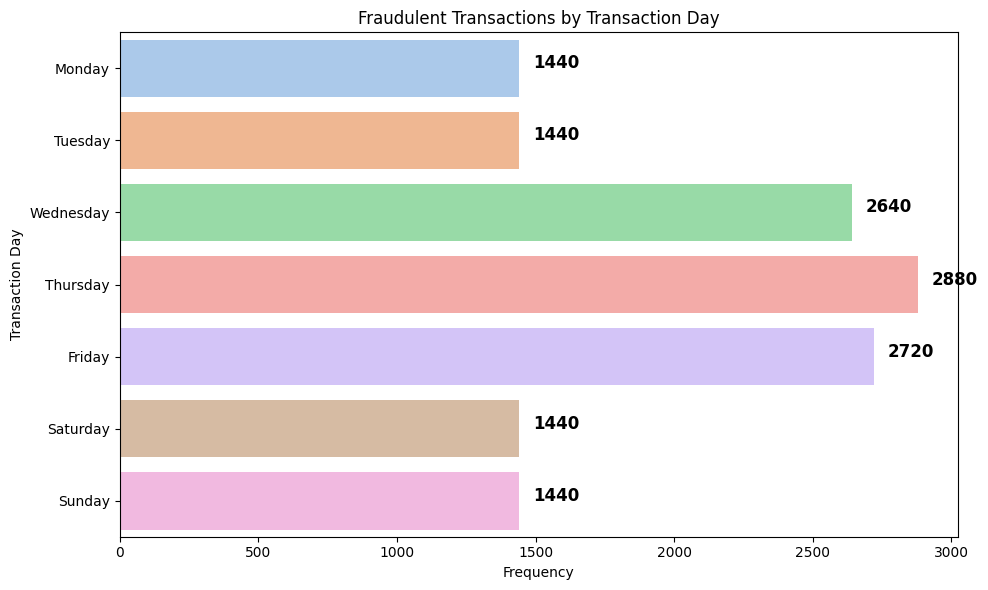

In [40]:
fraud_counts = fraud_df['Transaction_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0  # Ensuring all days are represented
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Day")
plt.title("Fraudulent Transactions by Transaction Day")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()

Observations
- Thursday (2880 fraud cases) has the highest number of fraudulent transactions.
- Friday (2720 cases) and Wednesday (2640 cases) also see a higher number of fraud cases.
- Fraudulent activities increase mid-week (Wednesday–Friday), potentially due to higher transaction volumes. Lower fraud activity on weekends might indicate reduced banking or transaction activity.

# Bivariate Analysis

C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Age'>,
        <Axes: xlabel='Account_Balance', ylabel='Age'>,
        <Axes: xlabel='Is_Fraud', ylabel='Age'>,
        <Axes: xlabel='Transaction_year', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Account_Balance', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_year', ylabel='Transaction_Amount'>],
       [<Axes: xlabel='Age', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Account_Balance'>,
        <Axes: xlabel='Account_Balance', ylabel='Account_Balance'>,
        <Axes: xlabel='Is_Fraud', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_year', ylabel='Account_Balance'>],
       [<Axes: xlabel='Age', ylabel='Is_Fraud'>,
        <Axes: xla

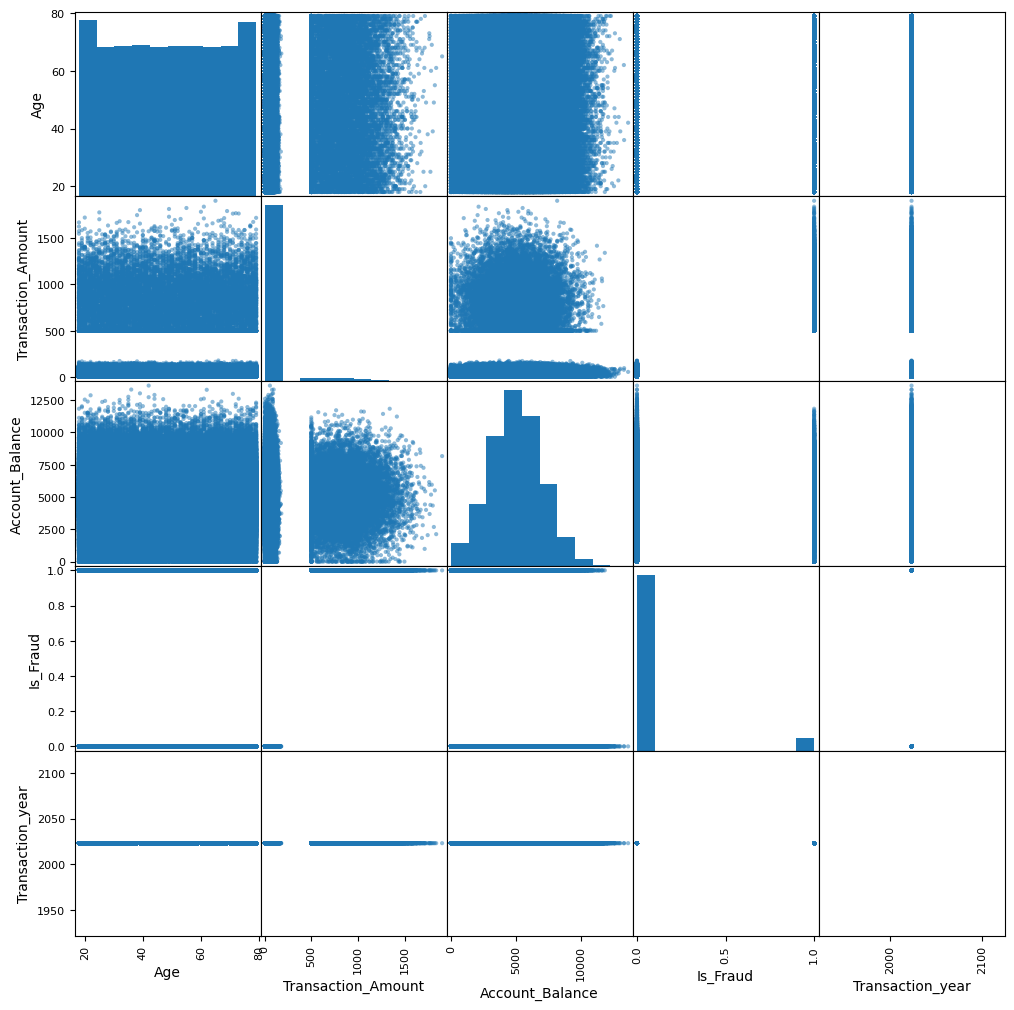

In [41]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

**Observations**
1. Transaction Amount vs. Account Balance
Most transactions occur at lower amounts, with few high-value outliers.
Account balance follows a normal distribution, centered around mid-range values.

2. Age vs. Other Variables
Age distribution is uniform, except for peaks at both ends.
No clear pattern between age and transaction amount or fraud.

3. Fraudulent Transactions (Is_Fraud)
Fraud cases appear highly concentrated at specific points.
Fraud seems unrelated to age but may be linked to certain transaction behaviors.


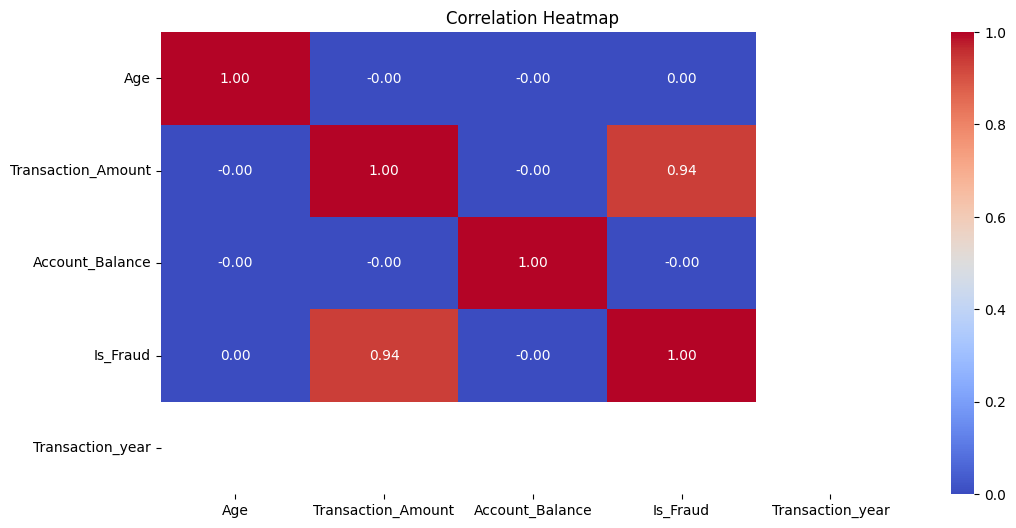

In [42]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations**
1. High Correlation Between Transaction_Amount and Is_Fraud (0.94)
Fraudulent transactions are strongly associated with higher transaction amounts.
Indicates that large transactions might be a key risk factor for fraud.

2. No Significant Correlation With Age or Account_Balance
Age and Account_Balance have near-zero correlations with fraud.
This suggests that fraudulent transactions occur across all age groups and account balances.

3. Transaction_Year Missing
The correlation matrix does not display Transaction_Year, possibly due to data type issues.
The column may be formatted as an object/string instead of a numerical or datetime type.

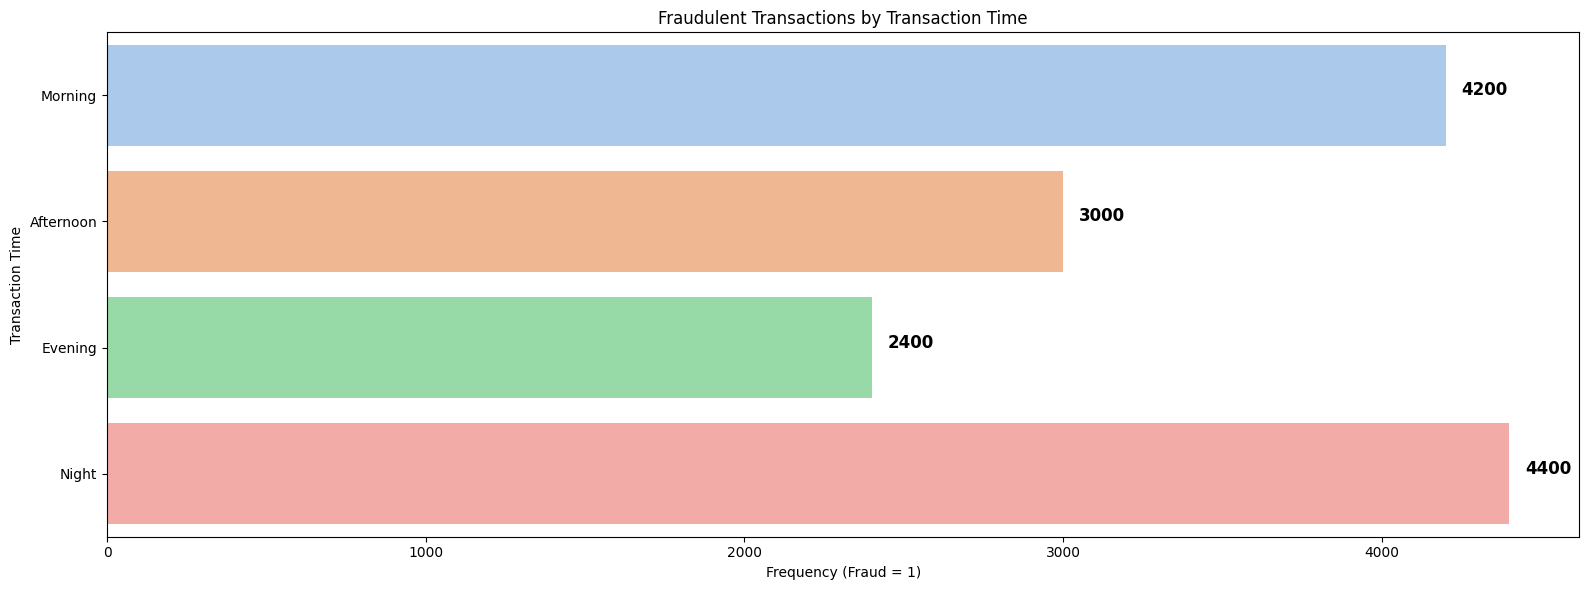

In [44]:
fraud_df = df[df['Is_Fraud'] == 1]

# Count occurrences for each transaction time category
fraud_counts = fraud_df['Transaction_Time'].value_counts().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night'], fill_value=0
)  

# Plot the data
plt.figure(figsize=(16, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend = False)
plt.xlabel("Frequency (Fraud = 1)")
plt.ylabel("Transaction Time")
plt.title("Fraudulent Transactions by Transaction Time")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


**Observations**
Most fraud occurs at Night and Morning. Higher fraud at night and early morning could indicate:
- Less oversight or weaker fraud detection during off-peak hours.
- Fraudsters exploiting late-night transaction patterns.
- Lower fraud in the evening may align with typical user behavior, reducing anomalies. 

# Multivariate Analysis

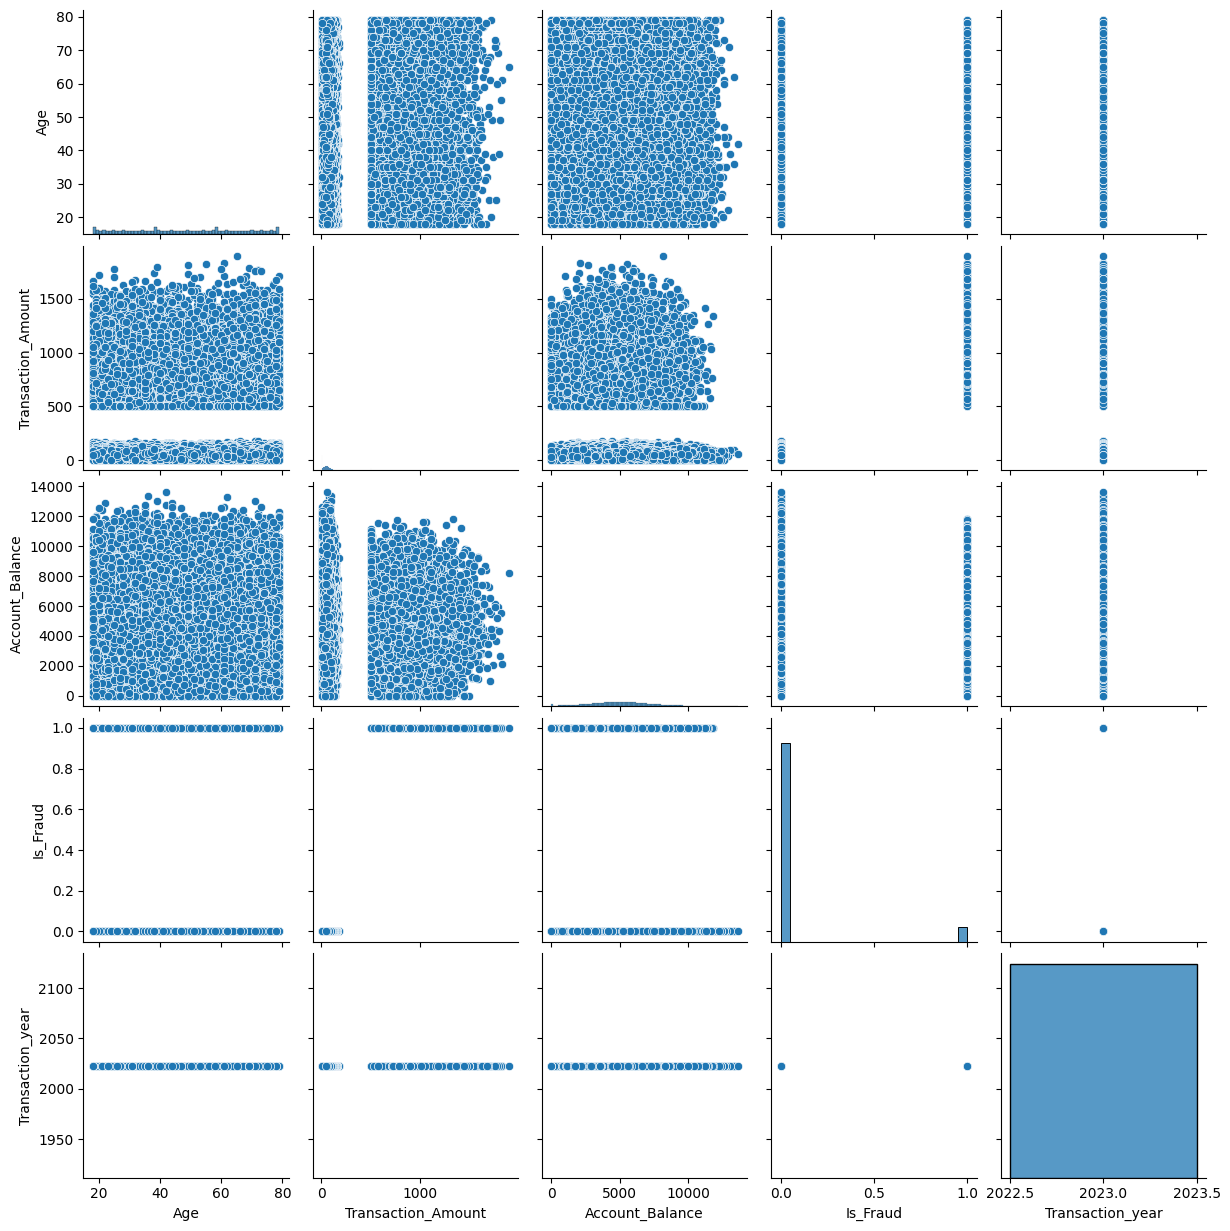

In [45]:
sns.pairplot(df)

# Relationship between Target and other Variables

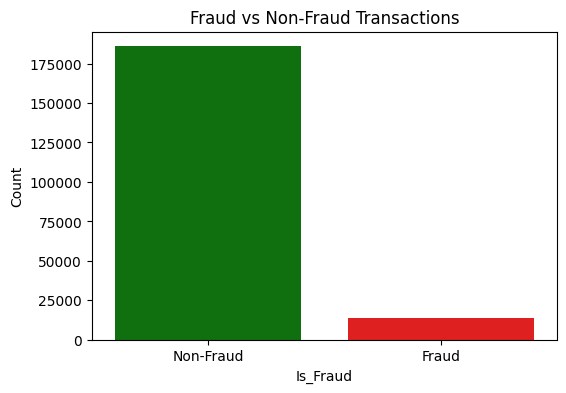

In [46]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, hue=fraud_count.index, palette=['green', 'red'], legend=False)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

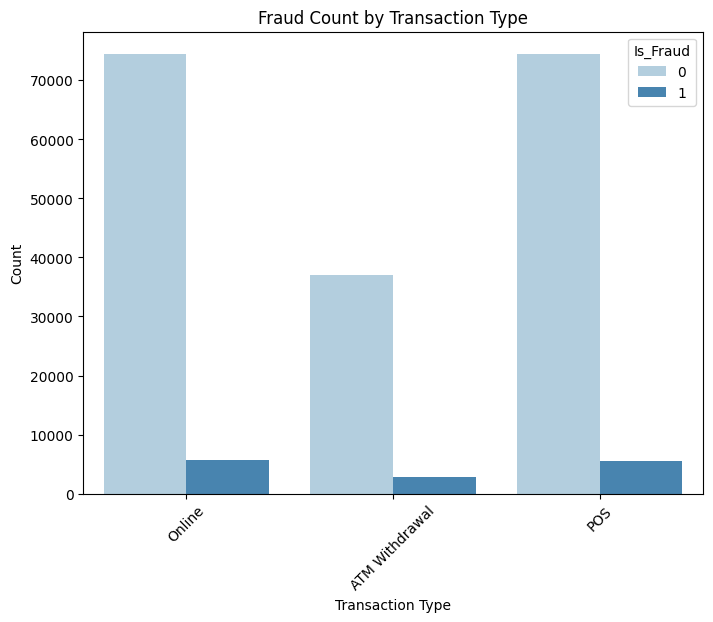

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x="Transaction_Type", hue="Is_Fraud", data=df, palette="Blues")
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**\
Online and POS transactions have the highest fraud cases compared to ATM withdrawals.
Fraud occurs less frequently in ATM withdrawals, possibly due to stricter security measures (e.g., PIN verification, physical card presence).
Non-fraudulent transactions dominate across all transaction types, which aligns with the class imbalance in the dataset.
\
Online transactions are more vulnerable to fraud, likely due to card-not-present fraud, phishing, or compromised credentials.
POS transactions also show notable fraud cases, possibly due to stolen/cloned card usage.
ATM withdrawals are less frequently fraudulent, suggesting fraudsters prefer remote, anonymous methods over physical transactions.

# Outliers

Age                      Axes(0.125,0.11;0.133621x0.77)
Transaction_Amount    Axes(0.285345,0.11;0.133621x0.77)
Account_Balance        Axes(0.44569,0.11;0.133621x0.77)
Is_Fraud              Axes(0.606034,0.11;0.133621x0.77)
Transaction_year      Axes(0.766379,0.11;0.133621x0.77)
dtype: object

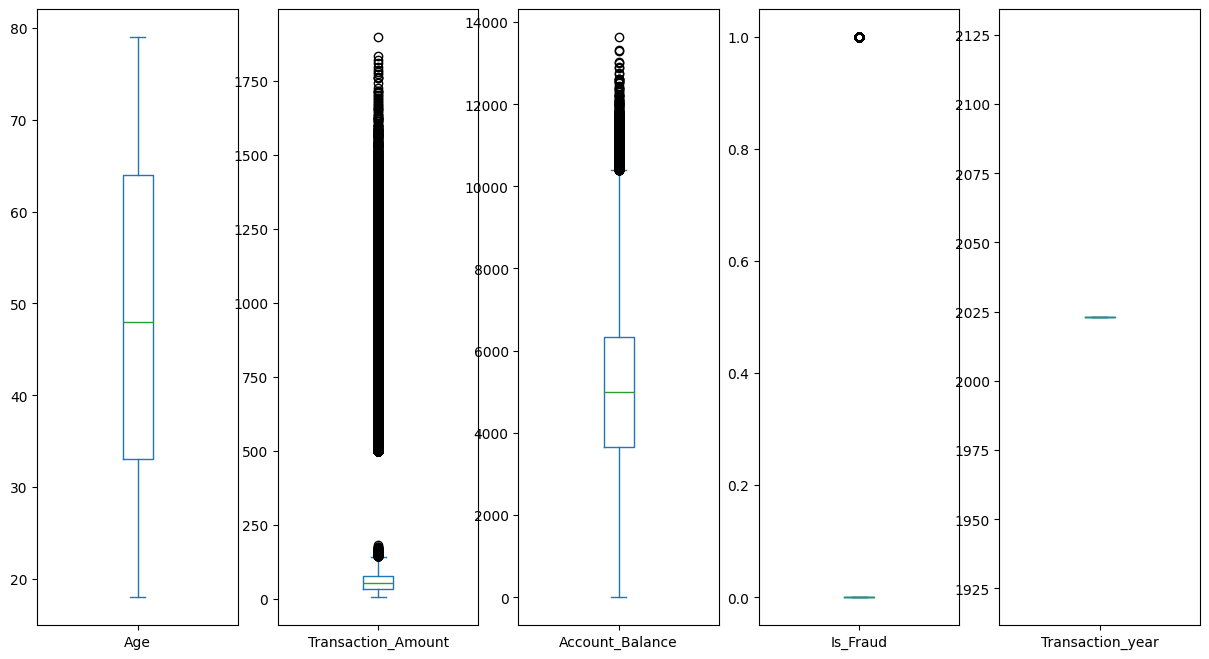

In [48]:
df.plot(kind='box', subplots=True, figsize=(15,8))

**Observations**
1. Age Distribution
The age distribution is fairly uniform, with no extreme outliers.
The median age is around 50 years, with a range from 20 to 80 years.

2. Transaction Amount
Numerous high-value outliers are present beyond the upper quartile.
Most transactions are of low value, but extreme cases reach over 1750.

3. Account Balance
The distribution is right-skewed, with a median balance of around 5000–6000.
A large number of outliers appear beyond 12,000, indicating a few users hold significantly higher balances.

4. Is_Fraud (Binary 0/1)
As expected, fraud cases are represented as 0 (non-fraud) and 1 (fraud).
The plot confirms the imbalance, with fraud cases being much fewer.

5. Transaction Year Anomaly
The Transaction Year values are unrealistic, with entries reaching beyond 2100.
This suggests a data formatting issue or incorrect parsing.

In [1]:
!pip install ydata_profiling

In [2]:
from ydata_profiling import ProfileReport

c:\Users\Palvi\anaconda3\envs\Test_Environment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

profile = ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]


# Data Prerpocessing

This data preprocessing is for the Bank_Transaction_Fraud_Detection.csv file.  
The dataset contains 23 columns and 200,000 rows, with same column names but different contents for each column.  
The dataset background is in United States, with amrican cities and states but different payment currency.  

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

#### Data overview 

In [ ]:
# Load the dataset
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

Extracting Date and Time Features for Transaction Analysis

In [337]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday  

In [339]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Transaction_Time'].apply(categorize_time)

C:\Windows\Temp\ipykernel_28760\3243298511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


#### Drop column

In [344]:
df = df.drop_duplicates()

In [346]:
unique_counts = df[['Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_Weekday']].nunique()
print(unique_counts)

Transaction_Year        1
Transaction_Month       5
Transaction_Day        31
Transaction_Weekday     7
dtype: int64


In [348]:
df_new = df.drop(columns=['Customer_ID', 'Customer_Name', 
                          'Transaction_ID', 'Merchant_ID',
                          'Transaction_Date','Transaction_Time','Transaction_Year',
                          'Customer_Contact', 'Customer_Email'])

df_new.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,25,CA,Los Angeles,Branch B,Checking,102.690676,Online,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,Gift,1,1,6,Night
1,Female,58,FL,New York,Branch C,Savings,83.034624,ATM Withdrawal,Luxury,7833.088780,Web,TX,Android,0,USD,Payment,1,1,6,Night
2,Female,71,PA,Dallas,Branch A,Savings,51.521278,ATM Withdrawal,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,Subscription,1,1,6,Night
3,Female,27,NY,Chicago,Branch A,Savings,74.897156,ATM Withdrawal,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,Subscription,1,1,6,Night
4,Male,28,OH,Philadelphia,Branch B,Savings,5.000000,Online,Electronics,4877.511195,Web,PA,Linux,0,CAD,Gift,1,1,6,Night


In this part, as the columns—'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Merchant_ID', 'Customer_Contact', and 'Customer_Email'—contain unique identifiers that do not contribute to our analysis and can be excluded.

Similarly, 'Transaction_Date' and 'Transaction_Time' are no longer needed, as their formats have already been transformed, and new relevant columns have been created.

Additionally, 'Transaction_Year' only has one distinct value in this whole column, providing no meaningful variance in this dataset.  
While I keep 'Transaction_Month', and 'Transaction_Currency' this time, as the new dataset contains more diversity in these two columns.

In [350]:
df_new.to_csv('new_dataset.csv', index=False) #Will be further used for clustering

In [352]:
print(df_new['Is_Fraud'].value_counts(normalize=True))

Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


In [354]:
import os
print("path：", os.getcwd())

path： C:\Users\Administrator\INSY 695 Enterprise AI


In [356]:
df_new = pd.read_csv("new_dataset.csv")

#### Create a Test Set

In [359]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.2, stratify=df_new['Is_Fraud'], random_state=42)


print("Train Set Class Distribution:\n", train_set['Is_Fraud'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Is_Fraud'].value_counts(normalize=True))


Train Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64
Test Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


#### Categorical into Numerical 

In [362]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold


categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

 
dummy_encode_cols = []  
label_encode_cols = []  
freq_encode_cols = []  
target_encode_cols = []

for col in categorical_cols:
    num_unique = train_set[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)



Dummy Encoding: ['Gender', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Transaction_Device', 'Transaction_Currency', 'Time_Category']
Label Encoding: ['State', 'City', 'Merchant_Category', 'Transaction_Location', 'Device_Type', 'Transaction_Description']
Frequency Encoding: []
Target Encoding: []


For the new dataset, there are no columns qualify in Frequency Encoding (20-50 distinct categories) and Target Encoding (>50 distinct categories), and only using dummify and label encoding to handle the categorical variables into numerical. 

In [364]:
# 1. Dummy Encoding
train_set = pd.get_dummies(train_set, columns=dummy_encode_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=dummy_encode_cols, drop_first=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(0, inplace=True)

# 2. Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])  
    test_set[col] = test_set[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  
    label_encoders[col] = le  

# 3. Frequency Encoding
for col in freq_encode_cols:
    freq_map = train_set[col].value_counts(normalize=True).to_dict()
    train_set[col] = train_set[col].map(freq_map)
    test_set[col] = test_set[col].map(freq_map).fillna(train_set[col].mean())

# 4. K-Fold Target Encoding
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in target_encode_cols:
    train_set[col + '_target_enc'] = 0 
    for train_idx, val_idx in kf.split(train_set):
        train_fold = train_set.iloc[train_idx].copy()
        val_fold = train_set.iloc[val_idx].copy()

        mean_target = train_fold.groupby(col)['Is_Fraud'].mean()
        train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())

    test_set[col + '_target_enc'] = test_set[col].map(train_set.groupby(col)['Is_Fraud'].mean()).fillna(train_set['Is_Fraud'].mean())

train_set.drop(columns=target_encode_cols, inplace=True)
test_set.drop(columns=target_encode_cols, inplace=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(train_set.mean(), inplace=True)

print(f'Processed train set shape: {train_set.shape}')
print(f'Processed test set shape: {test_set.shape}')

Processed train set shape: (160000, 30)
Processed test set shape: (40000, 30)


In [365]:
# Check for remaining categorical columns
remaining_categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()
print("Remaining categorical columns:", remaining_categorical_cols)


Remaining categorical columns: []


In [368]:
print(train_set.dtypes)
print(train_set.head())  # To visually inspect the transformed data


Age                                  int64
State                                int32
City                                 int32
Transaction_Amount                 float64
Merchant_Category                    int32
Account_Balance                    float64
Transaction_Location                 int32
Device_Type                          int32
Is_Fraud                             int64
Transaction_Description              int32
Transaction_Month                    int64
Transaction_Day                      int64
Transaction_Weekday                  int64
Gender_Male                           bool
Bank_Branch_Branch B                  bool
Bank_Branch_Branch C                  bool
Bank_Branch_Branch D                  bool
Account_Type_Checking                 bool
Account_Type_Savings                  bool
Transaction_Type_Online               bool
Transaction_Type_POS                  bool
Transaction_Device_Mobile             bool
Transaction_Device_POS Terminal       bool
Transaction

In [370]:
print("Dummy encoded columns example:")
print([col for col in train_set.columns if any(col.startswith(prefix) for prefix in dummy_encode_cols)])


Dummy encoded columns example:
['Gender_Male', 'Bank_Branch_Branch B', 'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking', 'Account_Type_Savings', 'Transaction_Type_Online', 'Transaction_Type_POS', 'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal', 'Transaction_Device_Web', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Transaction_Currency_USD', 'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night']


In [372]:
print("Unique values in label-encoded columns:")
for col in label_encode_cols:
    print(f"{col}: {train_set[col].unique()}")


Unique values in label-encoded columns:
State: [6 2 0 5 1 3 4]
City: [3 1 5 4 6 2 0]
Merchant_Category: [4 5 0 3 1 2]
Transaction_Location: [5 3 6 1 7 0 9 8 4 2]
Device_Type: [2 0 1 4 5 3]
Transaction_Description: [4 3 2 0 1]


#### Feature Importance

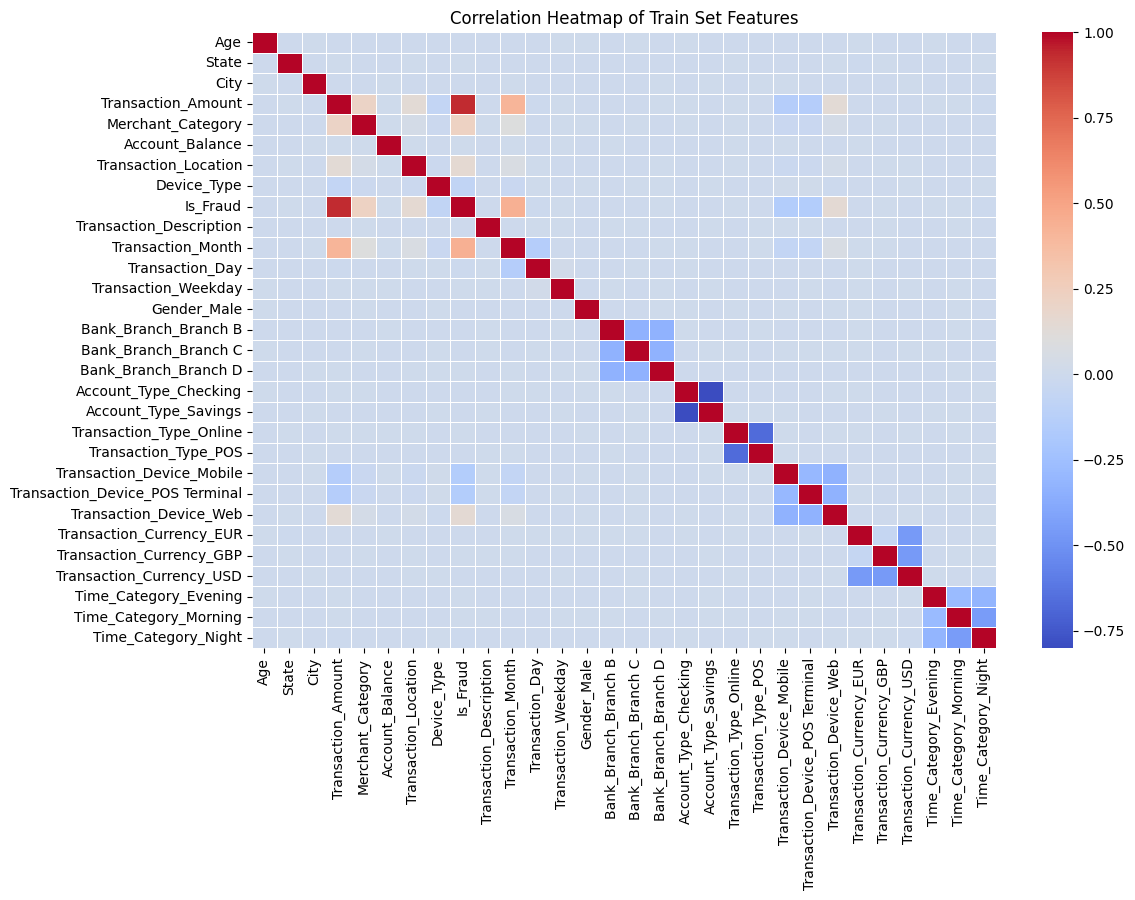

In [375]:
#import seaborn as sns
#import matplotlib.pyplot as plt

correlation_matrix = train_set.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Set Features")
plt.show()


In [377]:
fraud_correlation = train_set.corr()['Is_Fraud'].sort_values(ascending=False)
print(fraud_correlation)


Is_Fraud                           1.000000
Transaction_Amount                 0.936302
Transaction_Month                  0.438388
Merchant_Category                  0.225032
Transaction_Location               0.149990
Transaction_Device_Web             0.144429
Time_Category_Morning              0.004222
Bank_Branch_Branch D               0.003048
State                              0.002176
Time_Category_Evening              0.001910
Transaction_Weekday                0.001634
Transaction_Currency_GBP           0.001495
Account_Balance                    0.001195
Transaction_Type_Online            0.001137
Account_Type_Checking              0.000850
Age                               -0.000165
Transaction_Currency_EUR          -0.000187
City                              -0.000879
Transaction_Currency_USD          -0.000961
Bank_Branch_Branch B              -0.001141
Transaction_Type_POS              -0.001351
Account_Type_Savings              -0.002133
Transaction_Description         

In [379]:

threshold = 0.6
correlation_matrix = train_set.corr()

# Identify highly correlated features, excluding self-correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid duplicates
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_features.add((col1, col2))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2"])


# Print the first few rows
print(high_corr_df.head())

# Or, if using Jupyter Notebook, display a clean table
from IPython.display import display
display(high_corr_df)



                 Feature 1             Feature 2
0       Transaction_Amount              Is_Fraud
1  Transaction_Type_Online  Transaction_Type_POS
2    Account_Type_Checking  Account_Type_Savings


,Feature 1,Feature 2
0,Transaction_Amount,Is_Fraud
1,Transaction_Type_Online,Transaction_Type_POS
2,Account_Type_Checking,Account_Type_Savings


In this section, we analyzed feature correlations within the training dataset to detect highly correlated feature pairs.  

We set a correlation threshold of 0.6, meaning only feature pairs with a correlation greater than ±0.6 will be considered.

'Transaction_Amount' is correlated with 'Is_Fraud', which suggests that transaction amount plays a role in fraud prediction.  
'Transaction_Type_Online' and 'Transaction_Type_POS' are highly correlated, likely due to categorical encoding.  
'Account_Type_Checking' and 'Account_Type_Savings' show high correlation, possibly because they are mutually exclusive categories.


Transaction_Amount vs Is_Fraud

<Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>

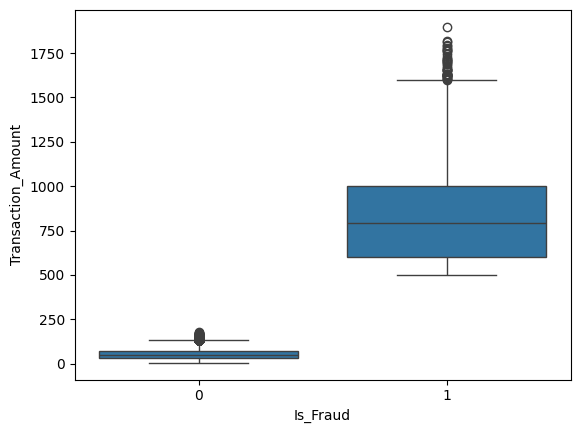

In [381]:
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=train_set)


In [383]:
correlation_matrix.loc[["Transaction_Amount", "Transaction_Type_Online", "Account_Type_Checking"],
                       ["Is_Fraud", "Transaction_Type_POS", "Account_Type_Savings"]]


,Is_Fraud,Transaction_Type_POS,Account_Type_Savings
Transaction_Amount,0.936302,-0.000714,-0.002207
Transaction_Type_Online,0.001137,-0.667944,0.001468
Account_Type_Checking,0.000850,-0.002653,-0.801070


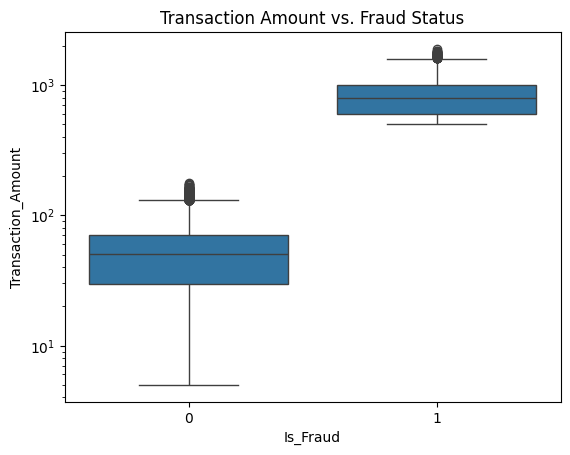

In [385]:


sns.boxplot(x="Is_Fraud", y="Transaction_Amount", data=train_set)
plt.yscale("log")  # Log scale to see outliers better
plt.title("Transaction Amount vs. Fraud Status")
plt.show()


In [387]:
print(train_set.groupby("Is_Fraud")["Transaction_Amount"].describe())


             count        mean         std    min         25%         50%  \
Is_Fraud                                                                    
0         148800.0   50.894869   28.173358    5.0   29.761953   50.110801   
1          11200.0  822.803931  259.658877  500.0  598.459334  795.079908   

                 75%          max  
Is_Fraud                           
0          70.242580   175.825322  
1         998.685954  1897.869419  


In [389]:
train_set["Transaction_Amount"] = np.log1p(train_set["Transaction_Amount"])
test_set["Transaction_Amount"] = np.log1p(test_set["Transaction_Amount"])


We initially visualised Transaction_Amount distribution for fraud vs. non-fraud cases.
And identified large variations and extreme outliers in transaction amounts.
Then applied a log scale to improve visualisation.

We finally transformed 'Transaction_Amount' using np.log1p() to normalise the distribution and improve model performance

Transaction_Type_Online vs Transaction_Type_POS

In [392]:
train_set[["Transaction_Type_Online", "Transaction_Type_POS"]].sum()


Transaction_Type_Online    64018
Transaction_Type_POS       64129
dtype: int64

In [394]:
print(train_set.groupby(["Transaction_Type_Online", "Transaction_Type_POS"]).size())


Transaction_Type_Online  Transaction_Type_POS
False                    False                   31853
                         True                    64129
True                     False                   64018
dtype: int64


If a transaction is Online (True), it is not POS (False), and vice versa.  
This suggests that the two features are just binary indicators of the same categorical variable.


In [396]:
train_set.drop(columns=["Transaction_Type_POS"], inplace=True)
test_set.drop(columns=["Transaction_Type_POS"], inplace=True)


Keeping both features in the model does not add new information but can introduce multicollinearity, which may affect model performance.  
Dropping one feature simplifies the model without losing important information.

Account_Type_Checking vs Account_Type_Savings


In [399]:
print(train_set.groupby(["Account_Type_Checking", "Account_Type_Savings"]).size())


Account_Type_Checking  Account_Type_Savings
False                  False                   16089
                       True                    95767
True                   False                   48144
dtype: int64


Based on groupby result:  
If a transaction belongs to 'Checking' (True), it does not belong to 'Savings' (False) and vice versa.  
This means one feature can be derived from the other, making one of them redundant.  

In [401]:
train_set.drop(columns=["Account_Type_Savings"], inplace=True)
test_set.drop(columns=["Account_Type_Savings"], inplace=True)


Keeping both features introduces multicollinearity, which can negatively affect model stability.  
Removing one of the two features simplifies the dataset without losing critical information.

In [403]:
for col in train_set.columns:
    print(col)


Age
State
City
Transaction_Amount
Merchant_Category
Account_Balance
Transaction_Location
Device_Type
Is_Fraud
Transaction_Description
Transaction_Month
Transaction_Day
Transaction_Weekday
Gender_Male
Bank_Branch_Branch B
Bank_Branch_Branch C
Bank_Branch_Branch D
Account_Type_Checking
Transaction_Type_Online
Transaction_Device_Mobile
Transaction_Device_POS Terminal
Transaction_Device_Web
Transaction_Currency_EUR
Transaction_Currency_GBP
Transaction_Currency_USD
Time_Category_Evening
Time_Category_Morning
Time_Category_Night


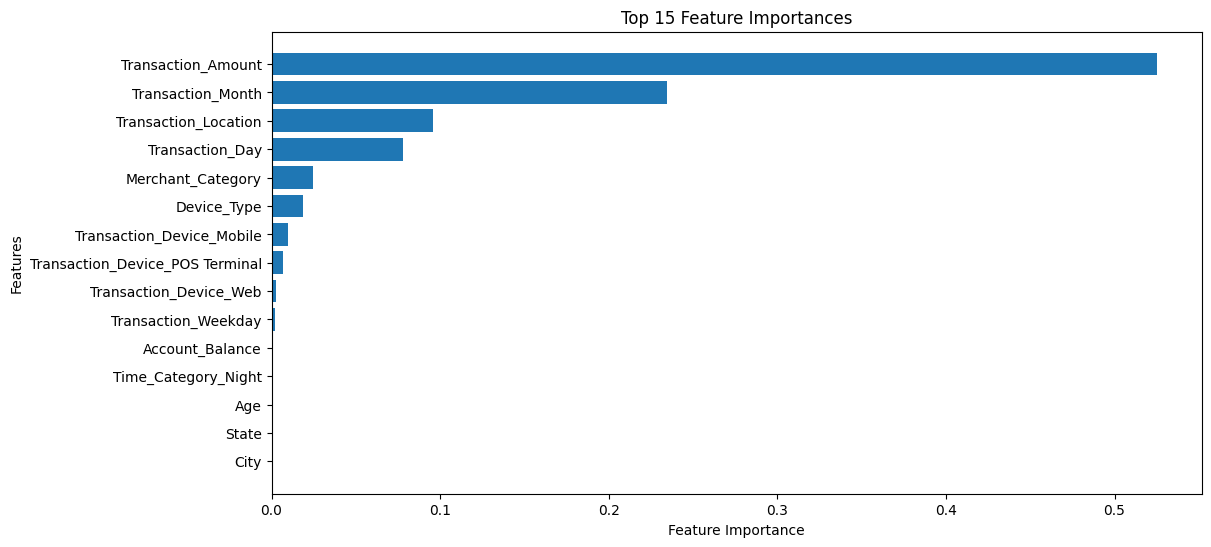

In [405]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

X_train = train_set.drop(columns=['Is_Fraud'])
y_train = train_set['Is_Fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [406]:
low_importance_features = feature_importances[feature_importances['Importance'] < 0.01]
print("Low-importance features:\n", low_importance_features)


Low-importance features:
                             Feature  Importance
18        Transaction_Device_Mobile    0.009720
19  Transaction_Device_POS Terminal    0.006985
20           Transaction_Device_Web    0.002723
11              Transaction_Weekday    0.002138
5                   Account_Balance    0.000134
26              Time_Category_Night    0.000129
0                               Age    0.000104
1                             State    0.000051
2                              City    0.000046
8           Transaction_Description    0.000041
17          Transaction_Type_Online    0.000024
15             Bank_Branch_Branch D    0.000023
14             Bank_Branch_Branch C    0.000022
23         Transaction_Currency_USD    0.000020
16            Account_Type_Checking    0.000017
12                      Gender_Male    0.000017
25            Time_Category_Morning    0.000016
21         Transaction_Currency_EUR    0.000014
22         Transaction_Currency_GBP    0.000012
13            

In [409]:
# Identify low-importance features
low_importance_threshold = 0.0005
drop_columns = feature_importances[feature_importances['Importance'] < low_importance_threshold]['Feature'].tolist()

print("Dropping columns:", drop_columns)

# Ensure only existing columns are dropped in X_train
drop_columns = [col for col in drop_columns if col in X_train.columns]

# Drop from X_train ONLY
X_train = X_train.drop(columns=drop_columns)

Dropping columns: ['Account_Balance', 'Time_Category_Night', 'Age', 'State', 'City', 'Transaction_Description', 'Transaction_Type_Online', 'Bank_Branch_Branch D', 'Bank_Branch_Branch C', 'Transaction_Currency_USD', 'Account_Type_Checking', 'Gender_Male', 'Time_Category_Morning', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Bank_Branch_Branch B', 'Time_Category_Evening']


Features with an importance score below 0.01 are identified as low-importance.  
Features with an importance below 0.0005 are marked for removal.  
These low-impact features are dropped to improve model efficiency while preserving predictive power.

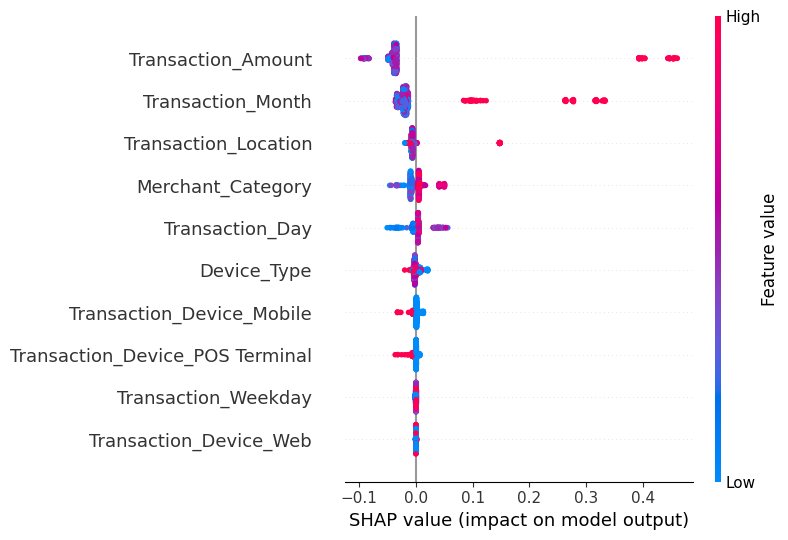

In [283]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Select top 10 most important features based on Random Forest importance
top_features = feature_importances['Feature'][:10].tolist()  
X_train_selected = X_train[top_features]  

# Train a simpler Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, y_train) 

# Take a small sample for SHAP analysis
sample_size = 500  # Adjustable based on performance
X_sample = X_train_selected.sample(sample_size, random_state=42)

# Compute SHAP values
explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary for class 1 (fraud)
shap.summary_plot(shap_values[:, :, 1], X_sample)


In [152]:
explainer = shap.KernelExplainer(rf.predict_proba, X_sample)
shap_values = explainer.shap_values(X_sample)


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 500/500 [13:10<00:00,  1.58s/it]


In [162]:

print("SHAP values shape:", np.array(shap_values).shape)
shap_values[:5]

SHAP values shape: (500, 10, 2)


array([[[ 3.39735318e-02, -3.39735318e-02],
        [ 1.51315045e-02, -1.51315045e-02],
        [ 6.79995394e-03, -6.79995394e-03],
        [ 5.21031524e-03, -5.21031524e-03],
        [ 8.01713606e-03, -8.01713606e-03],
        [ 2.01817885e-03, -2.01817885e-03],
        [-6.79380304e-04,  6.79380304e-04],
        [-3.29257375e-04,  3.29257375e-04],
        [ 6.15359741e-05, -6.15359741e-05],
        [-9.57686057e-05,  9.57686057e-05]],

       [[ 3.47244817e-02, -3.47244817e-02],
        [ 1.65679461e-02, -1.65679461e-02],
        [ 6.94896907e-03, -6.94896907e-03],
        [-3.17029085e-03,  3.17029085e-03],
        [ 8.08124355e-03, -8.08124355e-03],
        [ 1.96145240e-03, -1.96145240e-03],
        [ 5.41255962e-03, -5.41255962e-03],
        [-3.06562416e-04,  3.06562416e-04],
        [-1.53634013e-05,  1.53634013e-05],
        [-9.66856987e-05,  9.66856987e-05]],

       [[ 4.07992553e-02, -4.07992553e-02],
        [ 2.14369881e-02, -2.14369881e-02],
        [ 7.23277427e-03, -7

Key Insights from SHAP Summary Plot  
Transaction Amount: Higher values increase fraud likelihood.  
Transaction Month & Location: Certain periods and locations have more fraudulent activities.  
Device Type & Transaction Device: Different devices have varying fraud risks.  


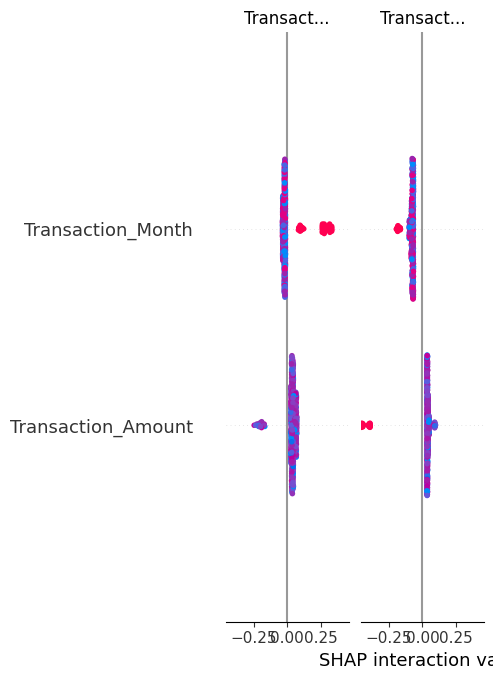

In [164]:
shap.summary_plot(shap_values, X_sample)


SHAP Interaction Plot Insights  
Analyzed feature dependencies, Transaction_Amount vs. Transaction_Month.  
Helps understand how multiple factors contribute to fraud.

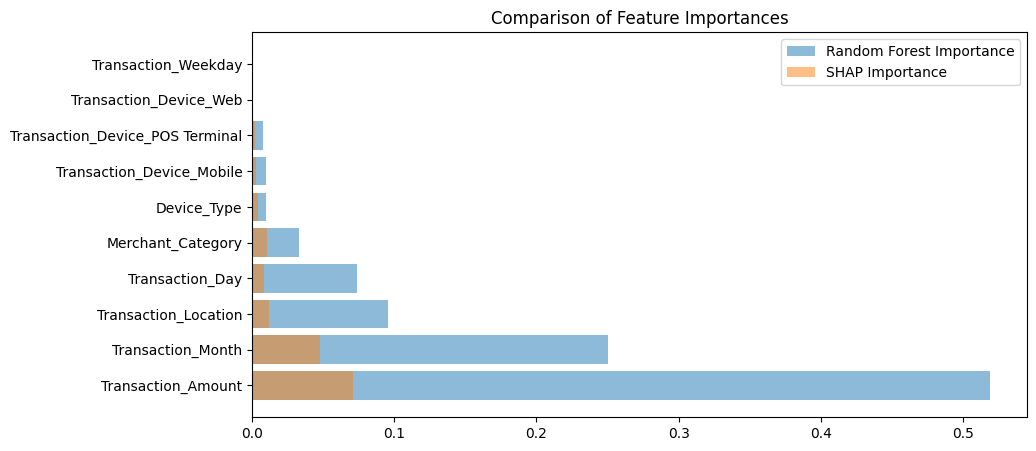

In [166]:
import matplotlib.pyplot as plt
import numpy as np

rf_importances = rf.feature_importances_

shap_importance = np.abs(shap_values).mean(axis=(0,2))

feature_names = X_sample.columns
plt.figure(figsize=(10,5))
plt.barh(feature_names, rf_importances, alpha=0.5, label="Random Forest Importance")
plt.barh(feature_names, shap_importance, alpha=0.5, label="SHAP Importance")
plt.legend()
plt.title("Comparison of Feature Importances")
plt.show()


In [411]:
X_train = X_train.drop(columns=["Transaction_Weekday", "Transaction_Device_Web"])


As both random forest and SHAP, 'Transaction_Weekday' and 'Transaction_Device_Web' show no importance and decided to drop those two columns.

New_dataset

In [414]:

X_test = test_set.drop(columns=['Is_Fraud'])  
X_test = X_test[X_train.columns]


In [416]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [418]:
print("Original columns in train_set:", train_set.columns)
print("Columns after dropping in X_train:", X_train.columns)


Original columns in train_set: Index(['Age', 'State', 'City', 'Transaction_Amount', 'Merchant_Category',
       'Account_Balance', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Weekday', 'Gender_Male', 'Bank_Branch_Branch B',
       'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking',
       'Transaction_Type_Online', 'Transaction_Device_Mobile',
       'Transaction_Device_POS Terminal', 'Transaction_Device_Web',
       'Transaction_Currency_EUR', 'Transaction_Currency_GBP',
       'Transaction_Currency_USD', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night'],
      dtype='object')
Columns after dropping in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object'

In [420]:
print("Remaining columns in X_train:", X_train.columns)
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')
Remaining columns in X_test: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')


In [422]:
print(train_set.select_dtypes(include=['object']).columns)
print(test_set.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index([], dtype='object')


In [424]:
y_test = test_set['Is_Fraud']

train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [426]:
train_set.to_csv("processed_train_set.csv", index=False)
test_set.to_csv("processed_test_set.csv", index=False)

# Modelling

**Since the old dataset we used at first performed poorly in fraud detection, our teammate attempted to improve the results by tuning the parameters of the XGBoost model. However, the adjustments did not yield significant improvements. Upon rechecking the dataset, he confirmed my earlier suspicion from a previous code version: the similarities between fraudulent and non-fraudulent transactions are too strong, making it difficult for the models to differentiate between them. To address this issue, an updated dataset has been provided by the teammate, who verified the problem. We will now apply the same methodologies for training and evaluation which were used in old version, with a final conclusion presented at the end of the process.**

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from collections import defaultdict
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split


In [8]:
# Used for clustering
df = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/new_dataset.csv")

In [9]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,25,CA,Los Angeles,Branch B,Checking,102.690676,Online,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,Gift,1,1,6,Night
1,Female,58,FL,New York,Branch C,Savings,83.034624,ATM Withdrawal,Luxury,7833.088780,Web,TX,Android,0,USD,Payment,1,1,6,Night
2,Female,71,PA,Dallas,Branch A,Savings,51.521278,ATM Withdrawal,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,Subscription,1,1,6,Night
3,Female,27,NY,Chicago,Branch A,Savings,74.897156,ATM Withdrawal,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,Subscription,1,1,6,Night
4,Male,28,OH,Philadelphia,Branch B,Savings,5.000000,Online,Electronics,4877.511195,Web,PA,Linux,0,CAD,Gift,1,1,6,Night


## Load train and test sets

In [2]:
train = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/processed_train_set.csv")
test = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/processed_test_set.csv")

In [3]:
train.columns

Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal',
       'Is_Fraud'],
      dtype='object')

In [4]:
X_train = train.drop(columns='Is_Fraud')
y_train = train['Is_Fraud']
X_test = test.drop(columns='Is_Fraud')
y_test = test['Is_Fraud']

## Apply SMOTETomek

In [5]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [6]:
df_resampled = pd.DataFrame(X_resampled, columns=train.columns) ## features train
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())


Is_Fraud
0    148800
1     74400
Name: count, dtype: int64


## Models and Performance Metrics

In [7]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, classification_report, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import matplotlib.pyplot as plt

In [8]:
def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df



## Train and evaluate the model


🔹 Training Logistic Regression...


🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74400, number of negative: 148800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 223200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

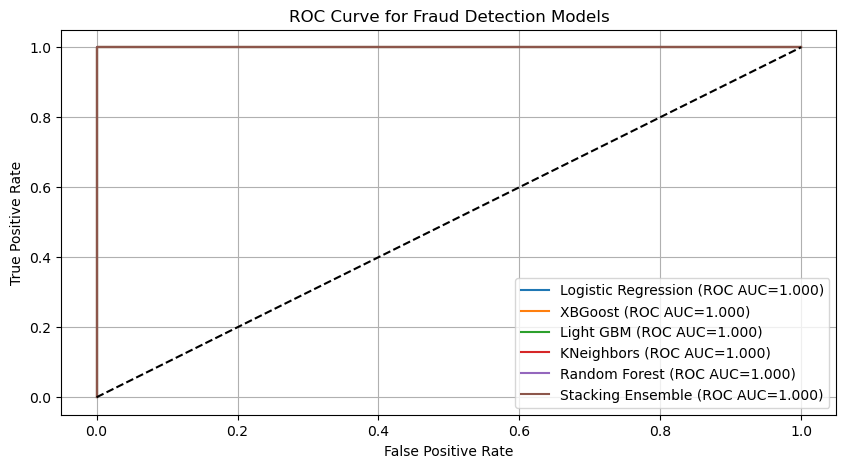

In [9]:
evaluation = modelling(X_resampled, y_resampled, X_test, y_test)

In [10]:
evaluation

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,XBGoost,1.0,1.0,1.0,1.0,1.0
2,Light GBM,1.0,1.0,1.0,1.0,1.0
3,KNeighbors,1.0,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0,1.0
5,Stacking Ensemble,1.0,1.0,1.0,1.0,1.0


In [11]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled,y_resampled)
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_resampled.columns,
    "Importance": feature_importances
})

# Sort by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


In [12]:
feature_importance_df

,Feature,Importance
0,Transaction_Amount,0.411554
4,Transaction_Month,0.307457
1,Merchant_Category,0.119798
5,Transaction_Day,0.094211
2,Transaction_Location,0.036776
6,Transaction_Device_Mobile,0.014818
7,Transaction_Device_POS Terminal,0.011599
3,Device_Type,0.003788


In [13]:
## Select features with greater than 0.04 importance
threshold = 0.003
selected_features = feature_importance_df[feature_importance_df["Importance"] > threshold]["Feature"].tolist()

In [14]:
## Refine x_resample and x_test
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]


🔹 Training Logistic Regression...


🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74400, number of negative: 148800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 223200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

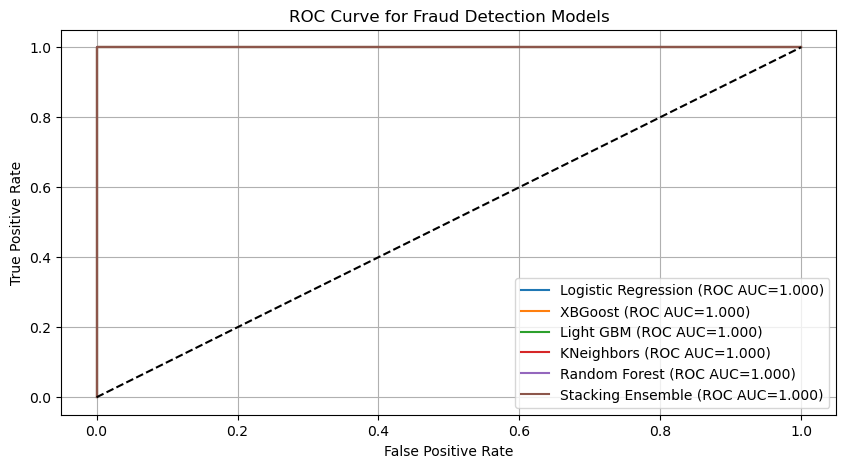

In [15]:
## Use selected features to train the model
results_selected = modelling(X_resampled_selected,y_resampled, X_test_selected, y_test)

In [33]:
results_selected

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,XBGoost,1.0,1.0,1.0,1.0,1.0
2,Light GBM,1.0,1.0,1.0,1.0,1.0
3,KNeighbors,1.0,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0,1.0
5,Stacking Ensemble,1.0,1.0,1.0,1.0,1.0


## Feature Engineering

In [16]:
data = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/Bank_Transaction_Fraud_Detection.csv")

In [17]:
df_copy = train
df_copy2 = test

In [ ]:
df_copy["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")
df_copy2["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")

In [ ]:
df_copy["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")
df_copy2["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy2["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")

In [ ]:
df_copy["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]
df_copy2["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy2["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]

In [21]:
df_copy2.head()

,Transaction_Amount,Merchant_Category,Transaction_Location,Device_Type,Transaction_Month,Transaction_Day,Transaction_Device_Mobile,Transaction_Device_POS Terminal,Is_Fraud,amount_to_avg_ratio,transactions_per_day,unique_merchants,average_spending_per_day,spending_change
0,3.998162,4,1,3,3,22,False,False,0,1.0,1,1,32415.45,0.000136
1,4.222577,5,1,1,3,30,False,False,0,1.0,1,1,43622.60,0.000099
2,4.412526,4,4,2,5,1,False,True,0,1.0,1,1,63062.56,0.000069
3,4.193827,3,0,1,3,1,False,False,0,1.0,1,1,14000.72,0.000450
4,3.472688,3,4,0,5,3,False,False,0,1.0,1,1,18335.16,0.000239


## Train and evaluate the models again

In [22]:
X_train = df_copy.drop(columns='Is_Fraud')
y_train = df_copy['Is_Fraud']
X_test = df_copy2.drop(columns='Is_Fraud')
y_test = df_copy2['Is_Fraud']

In [23]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
df_resampled = pd.DataFrame(X_resampled, columns=df_copy.columns) ## features df_copy
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())

Is_Fraud
0    148291
1     73891
Name: count, dtype: int64


In [25]:
def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df




🔹 Training Logistic Regression...



c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73891, number of negative: 148291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 222182, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

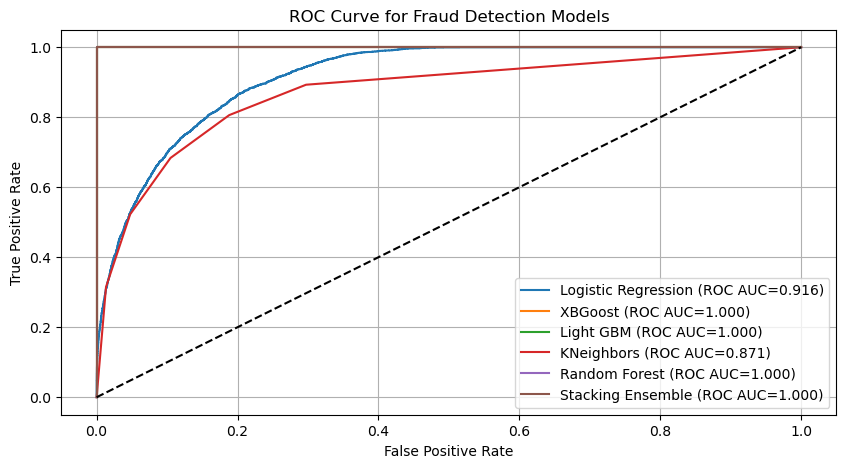

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,0.9163,0.8605,0.3022,0.7582,0.4321
1,XBGoost,1.0000,1.0000,1.0000,1.0000,1.0000
2,Light GBM,1.0000,1.0000,1.0000,1.0000,1.0000
3,KNeighbors,0.8708,0.8804,0.3293,0.6836,0.4444
4,Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000
5,Stacking Ensemble,1.0000,1.0000,1.0000,1.0000,1.0000


In [26]:
modelling(X_resampled, y_resampled, X_test, y_test)

In [27]:
from sklearn.metrics import precision_recall_curve

## We will switch the X_resample and y_resample  to the original ones using the train and test sets
model = xgb.XGBClassifier(random_state =42)
model.fit(X_resampled, y_resampled)
y_probs = model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
optimal_threshold = thresholds[recall.argmax()]  # Choose threshold maximizing recall

y_pred_adjusted = (y_probs > optimal_threshold).astype(int)


In [28]:
roc_auc = roc_auc_score(y_test, y_probs)

# Print Performance Metrics
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("🔹 Confusion Matrix:\n", conf_matrix)


🔹 ROC-AUC Score: 1.0000
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37200
           1       1.00      1.00      1.00      2800

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

🔹 Confusion Matrix:
 [[37200     0]
 [    0  2800]]


## Save the model and the notebook to github.

In [29]:
xgb_model = xgb.XGBClassifier(random_state =42)

In [31]:
import pickle
with open("xgb_fraud_model.pkl","wb") as f:
    pickle.dump(xgb_model, f)


###  Conclusion:  
* The initial evaluation of six machine learning models—Logistic Regression, XGBoost, LightGBM, K-Nearest Neighbors (KNN), Random Forest, and a Stacking Ensemble—yielded perfect results. All models achieved an ROC-AUC score of 1.0, along with 100% accuracy, precision, recall, and F1-score. These results indicate that the models completely distinguished fraudulent and non-fraudulent transactions without error. However, such perfect scores suggest potential data leakage or an overly simplified dataset.
* After applying feature selection using Random Forest, the models still achieved perfect scores across all metrics. This suggests that redundant or non-informative features were successfully removed without negatively impacting performance. However, the continued 100% performance across all models raises concerns about data leakage again. 
* With feature engineering applied, the results suggest that feature engineering introduced a challenge for simpler models like Logistic Regression and KNN, making them less effective at identifying fraudulent transactions. However, more complex models (e.g., XGBoost, Random Forest) remained highly effective.

**Potential Probelm:**  
* The consistently perfect scores (100% accuracy, precision, recall, and ROC-AUC) in the first two evaluations strongly suggest data leakage, meaning certain features may unintentionally expose fraud labels, resulting in artificially inflated performance.  
* Highly complex models like XGBoost and Random Forest achieving flawless results on both training and test data indicate a risk of memorization rather than true generalization.  
* A deeper analysis is required to determine whether the models are genuinely learning meaningful fraud detection patterns or simply exploiting artifacts within the dataset.

## Autoencoder (Unsupervised Learning Method for FRAUD detection)

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [11]:
# Define features and target
X = df.drop(columns=["Is_Fraud"])  # Features
y = df["Is_Fraud"]  # Target variable

In [ ]:
categorical_cols = ['Gender', 'Account_Type', 'Device_Type', 'Time_Category', 'Transaction_Type',
                    'Merchant_Category', 'Transaction_Device', 'State', 'City', 'Bank_Branch',
                    'Transaction_Location', 'Transaction_Description']

# Define different encoding strategies
one_hot_cols = ['Gender', 'Account_Type', 'Transaction_Type']  
label_cols = ['Time_Category']  
freq_cols = ['Device_Type', 'Transaction_Device', 'State', 'City', 'Bank_Branch'] 
target_cols = ['Merchant_Category', 'Transaction_Location', 'Transaction_Description']  

# Separate features and target variable
X = df.drop(columns=["Is_Fraud"])
y = df["Is_Fraud"]

# Apply one-hot encoding
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

# Apply label encoding
le = LabelEncoder()
for col in label_cols:
    X[col] = le.fit_transform(X[col])

# Apply frequency encoding
for col in freq_cols:
    freq_map = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_map)

# Apply target encoding
te = TargetEncoder()
X[target_cols] = te.fit_transform(X[target_cols], y)


,Age,State,City,Bank_Branch,Transaction_Amount,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,...,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category,Gender_1,Account_Type_1,Account_Type_2,Transaction_Type_1,Transaction_Type_2
0,0.114754,28538,28507,49849,0.051610,0,0.129140,46436,0,38104,...,1,0.0,0.0,1.0,3,True,True,False,True,False
1,0.655738,28648,28448,50027,0.041226,3,0.574615,53687,8,31016,...,2,0.0,0.0,1.0,3,False,False,True,False,False
2,0.868852,28496,28578,50274,0.024577,5,0.531099,46436,3,38104,...,4,0.0,0.0,1.0,3,False,False,True,False,False
3,0.147541,28613,28762,50274,0.036927,0,0.313217,46436,0,38104,...,4,0.0,0.0,1.0,3,False,False,True,False,False
4,0.163934,28631,28583,49849,0.000000,1,0.357801,53687,7,30969,...,1,0.0,0.0,1.0,3,True,False,True,True,False


In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test (Train on Normal Transactions Only)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Select only Non-Fraud transactions for Autoencoder Training
X_train_normal = X_train[y_train == 0]  

In [18]:
input_dim = X_train_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
encoded = Dense(4, activation="relu")(encoded)

decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded) 

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse") 


In [19]:
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)


Epoch 1/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8865 - val_loss: 0.7875
Epoch 2/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7807 - val_loss: 0.7741
Epoch 3/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7701 - val_loss: 0.7686
Epoch 4/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7648 - val_loss: 0.7657
Epoch 5/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7630 - val_loss: 0.7645
Epoch 6/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7625 - val_loss: 0.7645
Epoch 7/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.7614 - val_loss: 0.7630
Epoch 8/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.7595 - val_loss: 0.7600
Epoch 9/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7582 - val_loss: 0.7597
Epoch 10/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.7578 - val_loss: 0.7594
Epoch 11/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.7566 - val_loss: 0.7595
Epoch 12/50
4184/4184 ━━━━

In [20]:
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - X_test_reconstructed), axis=1)

threshold = np.percentile(reconstruction_errors, 95)

y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step


In [21]:
roc_auc = roc_auc_score(y_test, y_pred_autoencoder)
print(f"🔹 ROC AUC Score: {roc_auc:.4f}")

print("🔹 Classification Report:\n", classification_report(y_test, y_pred_autoencoder))


🔹 ROC AUC Score: 0.6962
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     37236
           1       0.57      0.42      0.48      2764

    accuracy                           0.94     40000
   macro avg       0.77      0.70      0.72     40000
weighted avg       0.93      0.94      0.93     40000



## Summary:  
*The autoencoder fraud detection model demonstrates moderate performance with a ROC AUC score of 0.6962, indicating that its ability to distinguish between fraudulent and non-fraudulent transactions is limited. The precision for fraud detection is 0.57, meaning that 57% of predicted fraud cases are truly fraudulent, while the recall is 0.42, indicating that the model only captures 42% of actual fraud cases. This results in an F1-score of 0.48, highlighting an imbalance between precision and recall. Its struggle to detect fraud effectively suggests that it is biased toward the non-fraud class.*

## Fraud Detection Conclusion:  
*The inconsistency between traditional models and the autoencoder suggests potential issues like data leakage, where certain features may unintentionally reveal fraud labels, leading to overly optimistic results in supervised models. Since the autoencoder is unsupervised, it eliminates this risk, relying instead on transaction reconstruction to detect fraud. Overfitting in traditional models is another concern, as they may memorize patterns rather than generalize well. Additionally, class imbalance remains a challenge. The difference in learning approaches—supervised vs. unsupervised—also contributes to the variation. If fine-tuning does not improve performance, further investigation into data leakage and testing on a truly unseen dataset is necessary.*

# Clustering: Customer Segmentation

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ["Age", "Transaction_Amount", "Account_Balance"]
categorical_features = ["Gender", "Account_Type", "Merchant_Category", "Device_Type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

gmm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gmm", GaussianMixture(n_components=4, random_state=42))
])

df["Cluster"] = gmm_pipeline.fit_predict(df)

df["Cluster"].value_counts()


Cluster
1    50756
0    50058
3    49936
2    49250
Name: count, dtype: int64

In [35]:
cluster_summary = df.groupby("Cluster")[["Age", "Transaction_Amount", "Account_Balance"]].mean()
print(cluster_summary)


               Age  Transaction_Amount  Account_Balance
Cluster                                                
0        57.825762        49365.427835     29160.809252
1        30.441741        49828.654832     29176.195531
2        44.012467        75318.190661     76087.218103
3        43.969581        23989.595274     76091.466983


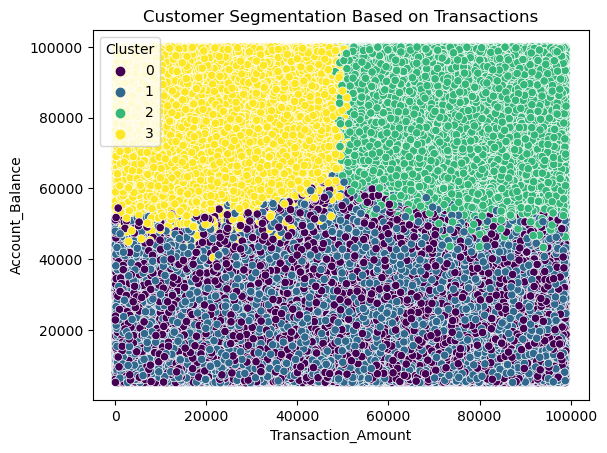

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Transaction_Amount", y="Account_Balance", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Transactions")
plt.show()


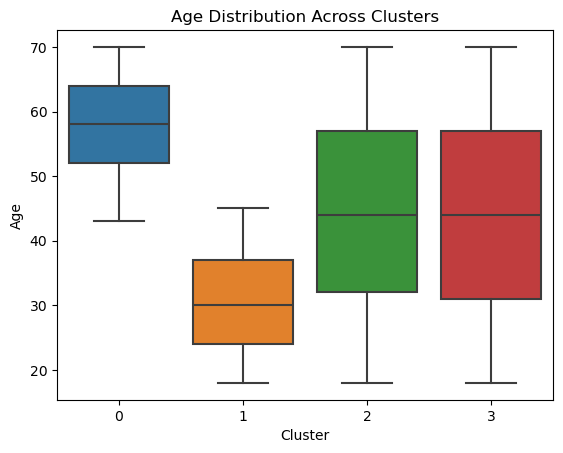

In [37]:
sns.boxplot(data=df, x="Cluster", y="Age")
plt.title("Age Distribution Across Clusters")
plt.show()


### Conclusion:  
*Although the dataset has been updated, I have confirmed that the informative columns remain identical to the previous version. Therefore, the analysis for this part remains unchanged from the old version, and I will not repeat it here.*

# Fine Tuning XGB Model

In [20]:
!pip install category_encoders optuna xgboost scikit-learn pandas matplotlib seaborn gitpython

import os
import git
import zipfile
import optuna
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [25]:
# 4. Load Train & Test Data

train_df = pd.read_csv("/data/processed_train_set.csv")
test_df = pd.read_csv("data/processed_test_set.csv")

In [19]:
train_df.head()

,Age,State,City,Transaction_Amount,Merchant_Category,Account_Balance,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,...,Account_Type_Checking,Account_Type_Savings,Transaction_Type_Online,Transaction_Type_POS,Transaction_Device_Mobile,Transaction_Device_POS Terminal,Transaction_Device_Web,Time_Category_Evening,Time_Category_Morning,Time_Category_Night
0,55,6,3,82.117696,4,5967.793219,5,2,0,4,...,False,False,False,True,False,False,True,False,False,False
1,59,2,1,74.399478,5,2539.502154,3,2,0,3,...,False,True,False,True,False,False,False,False,True,False
2,63,2,3,74.908080,0,4239.124607,3,2,0,2,...,False,True,True,False,False,False,False,False,False,False
3,48,0,1,540.199955,3,4981.358229,6,0,1,3,...,False,True,True,False,False,False,False,True,False,False
4,23,5,5,79.173752,0,6824.554127,1,2,0,2,...,False,True,False,False,False,True,False,True,False,False


In [26]:
# 2. Remove Transaction_Location from the Dataset (Data Leakage Prevention)

train_df = train_df.drop(columns=["Transaction_Location", "Transaction_Amount"], errors='ignore')
test_df = test_df.drop(columns=["Transaction_Location", "Transaction_Amount"], errors='ignore')

In [27]:
# 3. Apply Target Encoding to Merchant_Category

encoder = TargetEncoder(cols=["Merchant_Category"])
train_df["Merchant_Category"] = encoder.fit_transform(train_df["Merchant_Category"], train_df["Is_Fraud"])
test_df["Merchant_Category"] = encoder.transform(test_df["Merchant_Category"])

In [28]:
# 3. Prepare Features & Target

X = train_df.drop(columns=["Is_Fraud"])
y = train_df["Is_Fraud"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ensure test set features and labels are correctly extracted
X_test = test_df.drop(columns=["Is_Fraud"], errors='ignore')
y_test = test_df["Is_Fraud"] if "Is_Fraud" in test_df.columns else None


### Optuna

In [29]:
# 5. Define Optuna Objective Function for Hyperparameter Tuning

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": "gbtree",
        "lambda": trial.suggest_float("lambda", 5.0, 20.0, log=True),
        "alpha": trial.suggest_float("alpha", 5.0, 20.0, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "min_child_weight": trial.suggest_int("min_child_weight", 10, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False, verbosity=0)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc').mean()
    return score


In [30]:
# 6. Run Optuna Optimization

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:", study.best_params)


[I 2025-02-26 20:34:45,838] A new study created in memory with name: no-name-0ee82c02-8ee8-4b45-8463-6376f36fca2c
[I 2025-02-26 20:34:51,605] Trial 0 finished with value: 0.9999746858798962 and parameters: {'lambda': 9.737864142784929, 'alpha': 11.066167578923855, 'max_depth': 4, 'learning_rate': 0.060606628144007496, 'n_estimators': 304, 'min_child_weight': 13, 'subsample': 0.6724126195164526, 'colsample_bytree': 0.7040738934109703}. Best is trial 0 with value: 0.9999746858798962.
[I 2025-02-26 20:34:56,947] Trial 1 finished with value: 0.987058343608991 and parameters: {'lambda': 18.643966858433913, 'alpha': 14.581177100714612, 'max_depth': 3, 'learning_rate': 0.025819273590187434, 'n_estimators': 182, 'min_child_weight': 20, 'subsample': 0.7500753329365386, 'colsample_bytree': 0.9896358804565084}. Best is trial 0 with value: 0.9999746858798962.
[I 2025-02-26 20:35:01,447] Trial 2 finished with value: 0.9997466290967623 and parameters: {'lambda': 6.542516925459357, 'alpha': 10.200759

Best Hyperparameters: {'lambda': 11.552918430516232, 'alpha': 6.377279950730096, 'max_depth': 5, 'learning_rate': 0.28901944369301596, 'n_estimators': 260, 'min_child_weight': 15, 'subsample': 0.9732543725514585, 'colsample_bytree': 0.9184564157773536}


In [31]:
# 7. Train Final XGBoost Model with Best Parameters

best_params = {
    "lambda": 18.035420264774213,
    "alpha": 6.134039170033844,
    "max_depth": 2,
    "learning_rate": 0.01405371208315621,
    "n_estimators": 431,
    "min_child_weight": 17,
    "subsample": 0.56404781868734,
    "colsample_bytree": 0.8738544807326076
}

final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, verbosity=0)
final_model.fit(X_train, y_train)

XGBClassifier(alpha=6.134039170033844, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8738544807326076, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=18.035420264774213,
              learning_rate=0.01405371208315621, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=17, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=431, n_jobs=None, ...)

ROC AUC Score: 0.9867581275201613
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     29760
           1       0.74      0.53      0.62      2240

    accuracy                           0.95     32000
   macro avg       0.86      0.76      0.80     32000
weighted avg       0.95      0.95      0.95     32000



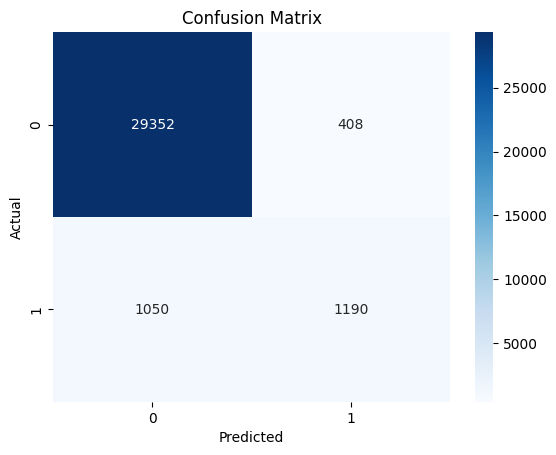

In [32]:
# 8. Model Evaluation

y_pred = final_model.predict(X_valid)
y_prob = final_model.predict_proba(X_valid)[:, 1]

print("ROC AUC Score:", roc_auc_score(y_valid, y_prob))
print("Classification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC AUC Score (Test): 0.9869806067588326
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     37200
           1       0.74      0.49      0.59      2800

    accuracy                           0.95     40000
   macro avg       0.85      0.74      0.78     40000
weighted avg       0.95      0.95      0.95     40000



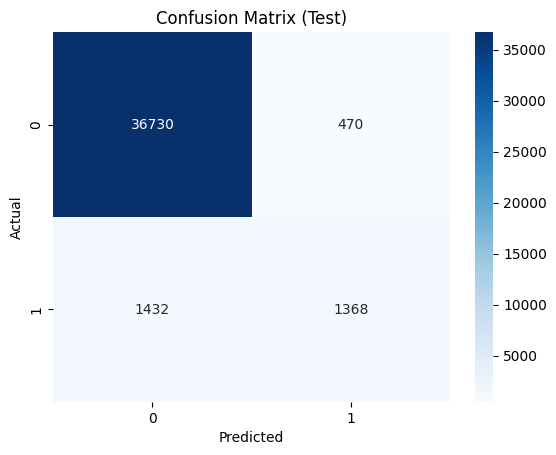

In [33]:
# 8. Predictions and Evaluation on Test Set

y_test_pred = final_model.predict(X_test)
y_test_prob = final_model.predict_proba(X_test)[:, 1]

print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_prob))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [34]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10))


                            Feature  Importance
3                 Merchant_Category    0.262213
7                   Transaction_Day    0.242981
5                       Device_Type    0.184776
17        Transaction_Device_Mobile    0.158396
18  Transaction_Device_POS Terminal    0.151633
0                               Age    0.000000
13            Account_Type_Checking    0.000000
21            Time_Category_Morning    0.000000
20            Time_Category_Evening    0.000000
19           Transaction_Device_Web    0.000000


In [38]:
import joblib

# Save the trained XGBoost model in the current directory
model_filename = "xgboost_fraud_model.pkl"
joblib.dump(final_model, model_filename)

print(f"Trained model saved as: {model_filename}")

Trained model saved as: xgboost_fraud_model.pkl


# CAUSAL INFERENCE

# Causal Inference 1: Age Based

## Hypothesis Statement for Age-Based Uplift

- **Null Hypothesis (H₀):** Being in the “Older” age group **does not** significantly affect the likelihood of fraud compared to the “Younger” group.  
- **Alternative Hypothesis (H₁):** Being in the “Older” age group **does** significantly affect (increase or decrease) the likelihood of fraud compared to the “Younger” group.

In [2]:
!pip install causalml --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causalml.inference.tree import UpliftTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind

Failed to import duecredit due to No module named 'duecredit'


In [17]:
# Load dataset
df = pd.read_csv('data/processed_train_set.csv')

# Drop unused variables
df.drop(columns=['Transaction_Amount', 'Transaction_Location'], inplace=True)

In [18]:
# Create Age_Group by binning Age into 'Younger' and 'Older'
df['Age_Group'] = pd.qcut(df['Age'], q=2, labels=['Younger', 'Older'])
df['Age_Group'] = df['Age_Group'].astype(str)  # Ensure Age_Group is of type string


In [19]:
# Define features and target
features = [col for col in df.columns if col not in ['Is_Fraud', 'Age_Group']]
X = df[features]
y = df['Is_Fraud']

# Convert boolean features to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


C:\Users\Palvi\AppData\Local\Temp\ipykernel_26760\220670434.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [20]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, df['Age_Group'], test_size=0.2, random_state=42
)

In [21]:
# Initialize and train UpliftTreeClassifier
uplift_model = UpliftTreeClassifier(control_name='Younger', max_depth=4, min_samples_leaf=100)
uplift_model.fit(X_train.values, treatment_train.values, y_train.values)

# Predict uplift scores
cate_scores = uplift_model.predict(X_test.values)

# Extract the correct uplift column
cate_scores = cate_scores[:, 1]  # Selecting the column corresponding to the treatment group (Older)

# Store results in a DataFrame
results_df = X_test.copy()
results_df['Age_Group'] = treatment_test.values
results_df['Fraud'] = y_test.values
results_df['CATE'] = cate_scores  # Now a valid 1D array

# Display summary statistics of CATE
print("CATE Summary Statistics:")
print(results_df.groupby('Age_Group')['CATE'].describe())

CATE Summary Statistics:
             count      mean       std       min       25%       50%  \
Age_Group                                                              
Older      15504.0  0.070545  0.006719  0.050594  0.070383  0.070383   
Younger    16496.0  0.070525  0.006753  0.050594  0.070383  0.070383   

                75%       max  
Age_Group                      
Older      0.071554  0.082102  
Younger    0.071554  0.082102  


**Insights**

- Both Older and Younger have very similar mean CATE values (~0.0705), suggesting that the uplift (i.e., the additional likelihood of fraud attributed to being in the Older group) is almost the same as for Younger.
- The standard deviations are also similar (~0.0067), indicating comparable variability in estimated uplift for both groups.
- The quartiles (25%, 50%, 75%) and the min/max values reveal nearly overlapping ranges, reinforcing that there isn’t a large or consistent difference between Older and Younger in this model’s predictions.
- Taken together, these statistics suggest that being in the Older group does not show a marked increase or decrease in fraud risk relative to Younger based solely on these uplift estimates.

C:\Users\Palvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Palvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


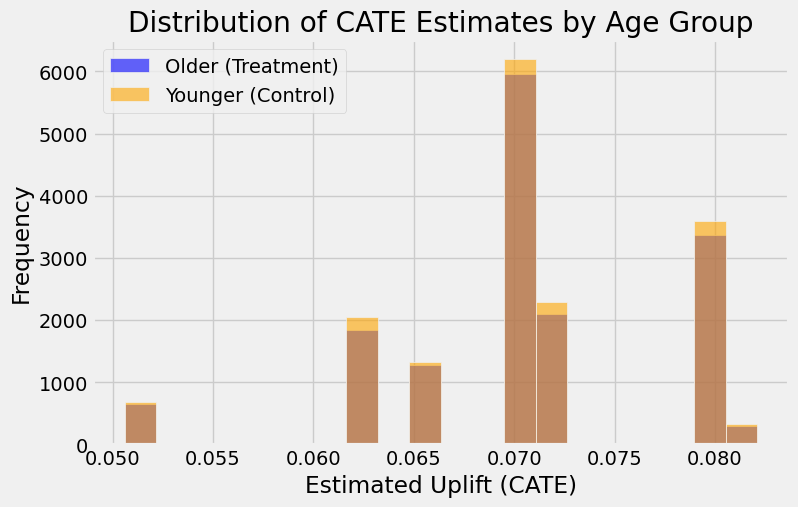

In [22]:
# Visualize the CATE distribution
plt.figure(figsize=(8,5))
sns.histplot(results_df[results_df['Age_Group'] == 'Older']['CATE'], bins=20, color='blue', label="Older (Treatment)", alpha=0.6)
sns.histplot(results_df[results_df['Age_Group'] == 'Younger']['CATE'], bins=20, color='orange', label="Younger (Control)", alpha=0.6)
plt.xlabel("Estimated Uplift (CATE)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of CATE Estimates by Age Group")
plt.show()

**Interpretation of the CATE Distributions**

- Both histograms peak around 0.070, suggesting that the average estimated uplift is nearly the same for Older and Younger.
- The shape and spread of the two distributions are similar, indicating minimal difference in fraud likelihood uplift between the two age groups.
- The slight overlap across the entire range (roughly 0.05 to 0.08) reinforces that being Older does not appear to confer a systematically higher or lower risk compared to Younger, at least based on this model.
- Overall, the visualization supports the notion that age group does not show a clear-cut causal impact on fraud in this dataset.

In [23]:
# Statistical test for CATE comparison
older_cate = results_df[results_df['Age_Group'] == 'Older']['CATE']
younger_cate = results_df[results_df['Age_Group'] == 'Younger']['CATE']

t_stat, p_value = ttest_ind(older_cate, younger_cate, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Old age significantly impacts fraud likelihood.")
else:
    print("Fail to reject the null hypothesis: No strong evidence that old age impacts fraud.")

T-statistic: 0.2677
P-value: 0.7889
Fail to reject the null hypothesis: No strong evidence that old age impacts fraud.


**Statistical Test Interpretation**

- The t-test yields a t-statistic of 0.2677 and a p-value of 0.7899, which is well above the conventional significance threshold of 0.05.
- As a result, we fail to reject the null hypothesis, meaning there is no statistically significant difference between Older and Younger groups in terms of fraud likelihood uplift.
- Practical Implication: This suggests that being in the Older age group does not have a meaningful causal impact on fraud based on this model and data, reinforcing the idea that age alone is not a strong determinant of fraudulent behavior.

In [24]:
# Display top features contributing to uplift
feature_importance = uplift_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Contributing to Uplift:")
print(feature_importance_df.head(10))

Top Features Contributing to Uplift:
                    Feature  Importance
4           Account_Balance    0.289132
15  Transaction_Type_Online    0.197453
22      Time_Category_Night    0.188617
6   Transaction_Description    0.123426
10     Bank_Branch_Branch B    0.107629
9               Gender_Male    0.093743
14     Account_Type_Savings    0.000000
21    Time_Category_Morning    0.000000
20    Time_Category_Evening    0.000000
19   Transaction_Device_Web    0.000000


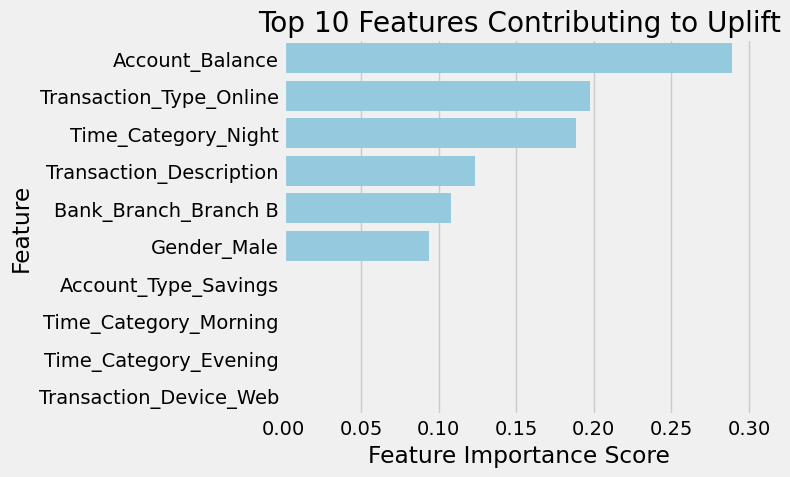

In [25]:
# Top 10 features
top_features = feature_importance_df.head(10)  

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_features, 
    x='Importance', 
    y='Feature', 
    color='skyblue'
)

plt.title("Top 10 Features Contributing to Uplift")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

C:\Users\Palvi\AppData\Local\Temp\ipykernel_26760\1744110842.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=results_df['Age_Group'], y=results_df['CATE'], ci=95, palette=['orange', 'blue'])


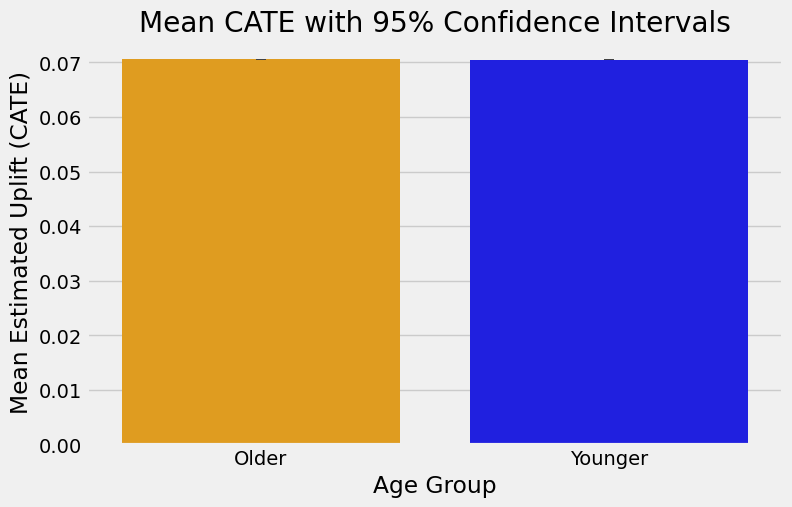

In [26]:
#Plot mean CATE
plt.figure(figsize=(8,5))
sns.barplot(x=results_df['Age_Group'], y=results_df['CATE'], ci=95, palette=['orange', 'blue'])
plt.xlabel("Age Group")
plt.ylabel("Mean Estimated Uplift (CATE)")
plt.title("Mean CATE with 95% Confidence Intervals")
plt.show()


**Interpretation of Mean CATE (95% CI)**

- The mean uplift for both Older and Younger clusters around 0.07, and their 95% confidence intervals overlap substantially.
- This overlap indicates no significant difference in estimated fraud uplift between the two age groups based on this model.
- In practical terms, age (as binned here) does not appear to be a strong driver of fraud risk in these data.

In [3]:
import shap

In [12]:
# SHAP ANALYSIS
# CAUTION: Interpreting SHAP for UpliftTreeClassifier is not straightforward,
# as it's not a standard scikit-learn pipeline. Some advanced hacks are needed

# Initialize SHAP Explainer
explainer = shap.Explainer(uplift_model.predict, X_train.values)

# Compute SHAP values
shap_values = explainer(X_test.values)

PermutationExplainer explainer: 32001it [1:07:12,  7.93it/s]                                                           


Fixed SHAP Values Shape: (32000, 23)
X_test Shape: (32000, 23)


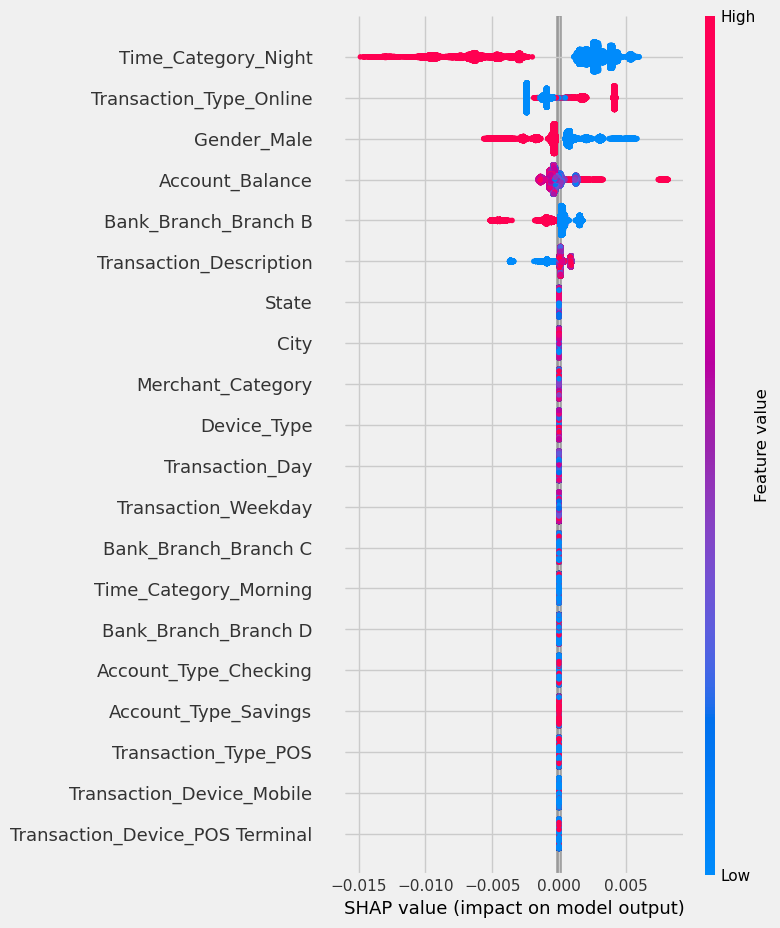

In [13]:
# Extract the correct SHAP values (selecting the treatment effect column)
shap_values_fixed = shap_values[..., 1]  # Selecting the second dimension

# Check if the shapes now match
print(f"Fixed SHAP Values Shape: {shap_values_fixed.shape}")
print(f"X_test Shape: {X_test.shape}")

# Now plot using corrected SHAP values
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values_fixed, X_test, feature_names=X_test.columns)


**SHAP Summary Plot Interpretation**

- Time_Category_Night and Transaction_Type_Online have the widest spread of SHAP values, indicating they strongly influence the model’s predictions. Rows (transactions) with higher “Night” or “Online” signals tend to push the model output (fraud likelihood) higher or lower, depending on the specific instance.
- Gender_Male and Account_Balance also show moderate impact. For Account_Balance, higher balances (pink points) can increase or decrease predicted fraud in different cases, implying a nuanced relationship.
- Many features (e.g., Transaction_Device_Mobile or Transaction_Device_POS Terminal) have near-zero SHAP ranges, suggesting they do not substantially affect the model’s output.
- Overall, time of transaction, transaction type (online vs. offline), gender, and account balance stand out as the most influential predictors of the model’s fraud outcome. The color gradient (blue→pink) shows whether the feature value is low or high for each point, helping explain how each feature instance pushes predictions up or down.

# Causal Inference 2: Transaction Mode Based

After discussion with our professor during our presentation, We took his advice and decided to formulate a second hypothesis centered on Transaction Mode — namely, whether online transactions exhibit a significantly different (higher or lower) fraud risk compared to offline transactions.

The uplift model treats Offline as the “control” group and Online as the “treatment” group. By estimating the Conditional Average Treatment Effect (CATE), we measure how much the probability of fraud changes when a transaction is online instead of offline.

- **Null Hypothesis (H₀):** There is **no significant difference** in fraud likelihood when a transaction is **Online** versus **Offline**.
- 
**Alternative Hypothesis (H₁):** There **is** a significant difference (increase or decrease) in fraud likelihood for **Online** transactions compared to **Offline** transactions.


In [4]:
# 1. Start fresh or use the same df
# Note: We'll reload df in case we changed it above:
df2 = pd.read_csv('data/processed_train_set.csv')
df2.drop(columns=['Transaction_Amount', 'Transaction_Location'], inplace=True, errors='ignore')

In [5]:
# Create a TREATMENT column based on whether transaction is online or not
df2['Transaction_Mode'] = df2['Transaction_Type_Online'].map({True: 'Online', False: 'Offline'})

CONTROL_NAME = 'Offline'
TREATMENT_NAME = 'Online'

In [6]:
# 2. Define Features & Outcome
# Exclude 'Is_Fraud' and 'Transaction_Mode', plus 'Age_Group' if present
features2 = [col for col in df2.columns if col not in ['Is_Fraud', 'Transaction_Mode', 'Age_Group']]
X2 = df2[features2]
y2 = df2['Is_Fraud']

# Convert boolean features to integers
X2 = X2.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\Palvi\AppData\Local\Temp\ipykernel_26760\778714240.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X2 = X2.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [7]:
# 3. Split Data
X2_train, X2_test, y2_train, y2_test, t2_train, t2_test = train_test_split(
    X2, y2, df2['Transaction_Mode'], test_size=0.2, random_state=42
)

In [8]:
# 4. Train UpliftTreeClassifier (Mode-based)
uplift_model2 = UpliftTreeClassifier(
    control_name=CONTROL_NAME,  # 'Offline'
    max_depth=4,
    min_samples_leaf=100
)
uplift_model2.fit(X2_train.values, t2_train.values, y2_train.values)

In [9]:
# 5. Predict CATE
cate_scores_2d_mode = uplift_model2.predict(X2_test.values)
# Typically: [CATE_Offline, CATE_Online]
cate_scores_mode = cate_scores_2d_mode[:, 1]  # index=1 for 'Online'

# 6. Results DataFrame
results_df2 = X2_test.copy()
results_df2['Transaction_Mode'] = t2_test.values
results_df2['Is_Fraud'] = y2_test.values
results_df2['CATE'] = cate_scores_mode

print("\n=== MODE-BASED UPLIFT RESULTS (Offline vs. Online) ===")
print("CATE Summary Statistics by Transaction_Mode:")
print(results_df2.groupby('Transaction_Mode')['CATE'].describe())


=== MODE-BASED UPLIFT RESULTS (Offline vs. Online) ===
CATE Summary Statistics by Transaction_Mode:
                    count      mean       std       min       25%       50%  \
Transaction_Mode                                                              
Offline           19155.0  0.070144  0.005546  0.039106  0.068629  0.068629   
Online            12845.0  0.070204  0.005578  0.039106  0.068629  0.068629   

                       75%       max  
Transaction_Mode                      
Offline           0.077959  0.077959  
Online            0.077959  0.077959  


**Interpretation of CATE Summary (Offline vs. Online)**

- The mean CATE values for Offline and Online transactions are both around 0.07, with very similar standard deviations (0.0055 vs. 0.0056).
- The quartiles (25%, 50%, 75%) are virtually identical, indicating both groups have overlapping distributions of uplift.
- This strongly suggests no major difference in the estimated fraud risk uplift between offline and online transactions according to the model.
- In practical terms, being online (versus offline) does not appear to have a meaningful causal effect on fraud likelihood for this dataset, consistent with the high p-value in the t-test.

C:\Users\Palvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Palvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


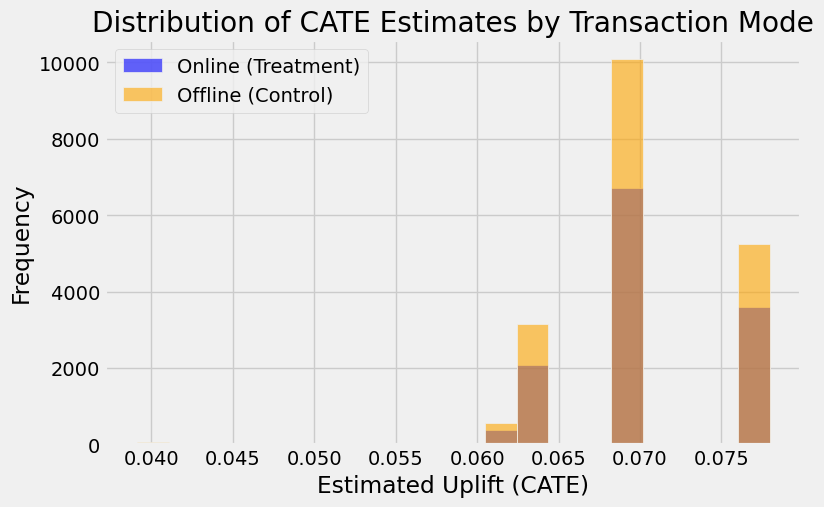

In [10]:
# 7. Visualize Distributions
plt.figure(figsize=(8,5))
sns.histplot(
    data=results_df2.loc[results_df2['Transaction_Mode'] == TREATMENT_NAME],
    x='CATE', bins=20, color='blue', label="Online (Treatment)", alpha=0.6
)
sns.histplot(
    data=results_df2.loc[results_df2['Transaction_Mode'] == CONTROL_NAME],
    x='CATE', bins=20, color='orange', label="Offline (Control)", alpha=0.6
)
plt.xlabel("Estimated Uplift (CATE)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of CATE Estimates by Transaction Mode")
plt.show()


**Interpretation of the Uplift Distributions (Offline vs. Online)**

- Both Offline (control) and Online (treatment) distributions cluster heavily around 0.065–0.070 in estimated uplift, indicating minimal difference in fraud likelihood changes.
- While Offline has slightly more observations near 0.070, and Online is a bit more prominent around 0.065, these differences are not large and substantially overlap.
- This visual aligns with the CATE summary statistics and t-test results, all suggesting that transaction mode (online vs. offline) does not substantially alter fraud risk in this dataset.

In [11]:
# 8. Statistical Test
online_cate = results_df2.loc[results_df2['Transaction_Mode'] == TREATMENT_NAME, 'CATE']
offline_cate = results_df2.loc[results_df2['Transaction_Mode'] == CONTROL_NAME, 'CATE']

t_stat_mode, p_value_mode = ttest_ind(online_cate, offline_cate, equal_var=False)
print(f"T-statistic: {t_stat_mode:.4f}")
print(f"P-value: {p_value_mode:.4f}")

if p_value_mode < 0.05:
    print("Reject null hypothesis: Online transactions significantly impact fraud likelihood.")
else:
    print("Fail to reject null hypothesis: No strong evidence that online vs. offline impacts fraud.")


T-statistic: 0.9456
P-value: 0.3444
Fail to reject null hypothesis: No strong evidence that online vs. offline impacts fraud.


**8T-Test Interpretation**

- We observe a t-statistic of 0.9456 and a p-value of 0.3444, which is well above the standard significance level (0.05).
- Therefore, we fail to reject the null hypothesis, meaning there is no statistically significant evidence that online transactions have a materially different effect on fraud likelihood compared to offline ones.
- This outcome is consistent with the similar mean CATE values and substantial overlap in their distributions, reinforcing the conclusion that transaction mode does not strongly impact fraud risk in this dataset.

C:\Users\Palvi\AppData\Local\Temp\ipykernel_26760\1740241097.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


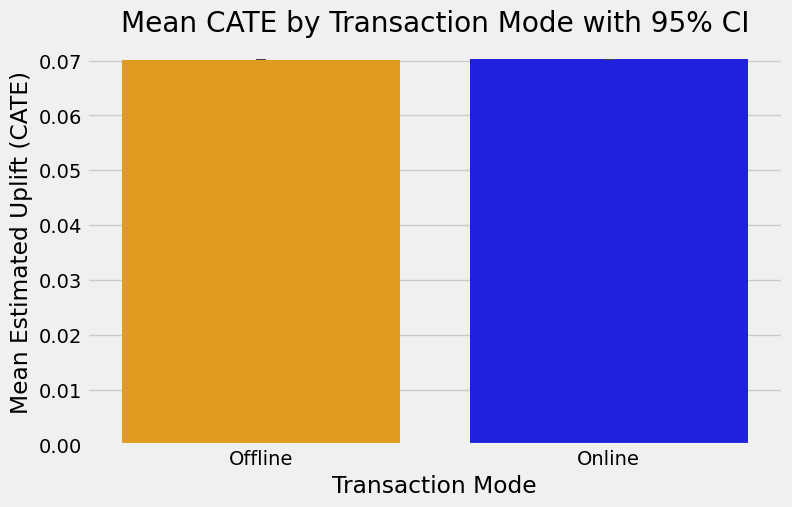

In [13]:
# Quick barplot of average CATE by group
plt.figure(figsize=(8,5))
sns.barplot(
    data=results_df2,
    x='Transaction_Mode',
    y='CATE',
    ci=95,
    palette=['orange', 'blue']
)
plt.xlabel("Transaction Mode")
plt.ylabel("Mean Estimated Uplift (CATE)")
plt.title("Mean CATE by Transaction Mode with 95% CI")
plt.show()


**Interpretation of Mean CATE (95% CI) for Transaction Mode**

- Both Offline and Online bars hover around 0.07, and their 95% confidence intervals overlap, indicating no statistically significant difference.
- This visualization echoes the t-test finding (p-value ≈ 0.34) that transaction mode does not have a strong causal influence on fraud outcome in this dataset.
- Practically, whether a transaction is Online or Offline does not appear to shift fraud risk in a meaningful way here.

PermutationExplainer explainer: 32001it [1:07:53,  7.85it/s]                                                           


SHAP Values Shape: (32000, 23)
X_test Shape: (32000, 23)


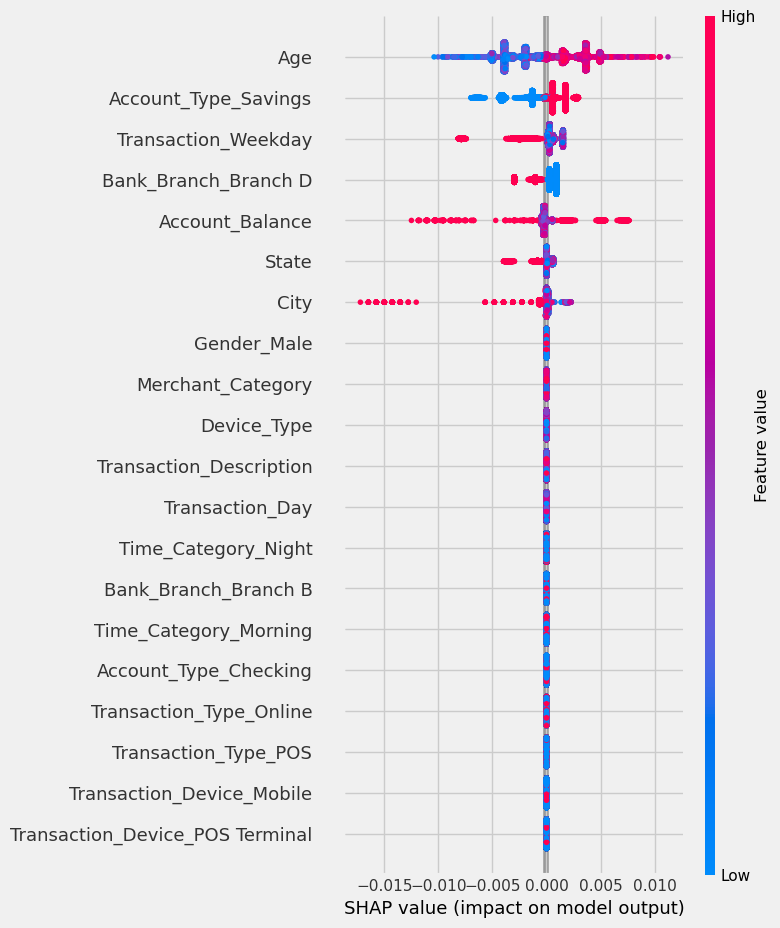

In [14]:
# SHAP Analysis

explainer = shap.Explainer(uplift_model2.predict, X2_train.values)
shap_values_raw = explainer(X2_test.values)
shap_values_online = shap_values_raw[..., 1]  # column=1 for 'Online'
print(f"SHAP Values Shape: {shap_values_online.shape}")
print(f"X_test Shape: {X2_test.shape}")
shap.summary_plot(shap_values_online, X2_test, feature_names=X2_test.columns)

**SHAP Summary Plot Interpretation (Offline vs. Online Model)**

- Age shows the broadest SHAP range, indicating it’s among the most influential features in predicting fraud for this model—even though the primary hypothesis for this experiment was about transaction mode.
- Account_Type_Savings, Transaction_Weekday, and Bank_Branch_Branch D also display moderate impact on the model output, suggesting these factors can shift fraud predictions more than transaction mode.
- Transaction_Type_Online is located toward the lower end of the SHAP value range, implying online vs. offline does not drastically change the model’s fraud predictions compared to other variables.
- This aligns with the t-test result (p-value > 0.05) and CATE distributions, indicating no significant difference in fraud likelihood between online and offline transactions. The SHAP explanation simply confirms that transaction mode is not a dominant predictor of fraudulent outcomes in this dataset.

In [12]:
# Feature Importances
feature_importance2 = uplift_model2.feature_importances_
feature_importance_df2 = pd.DataFrame({
    'Feature': features2,
    'Importance': feature_importance2
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Contributing to Uplift (Transaction Mode):")
print(feature_importance_df2.head(10))


Top Features Contributing to Uplift (Transaction Mode):
                   Feature  Importance
14    Account_Type_Savings    0.186549
0                      Age    0.182893
1                    State    0.163133
8      Transaction_Weekday    0.144743
2                     City    0.117427
12    Bank_Branch_Branch D    0.104120
4          Account_Balance    0.101135
21   Time_Category_Morning    0.000000
20   Time_Category_Evening    0.000000
19  Transaction_Device_Web    0.000000


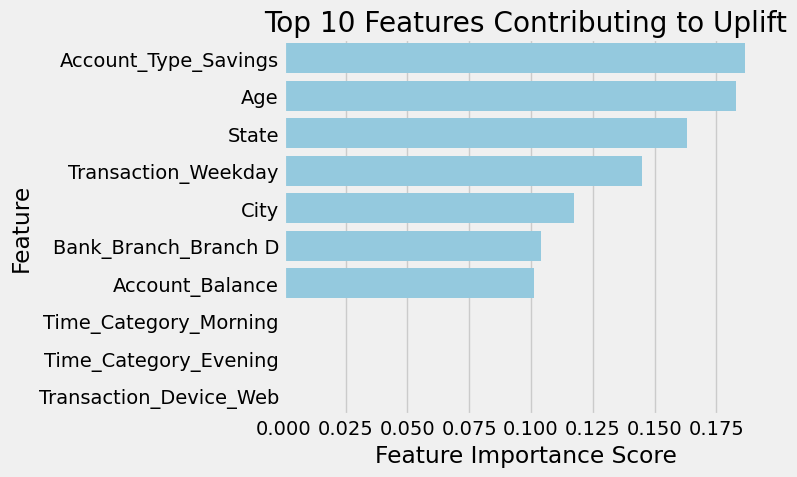

In [16]:
# Top 10 features
top_features2 = feature_importance_df2.head(10)  

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_features2, 
    x='Importance', 
    y='Feature', 
    color='skyblue'
)

plt.title("Top 10 Features Contributing to Uplift")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Overall Takeaways

**Age Group (Younger vs. Older)**
- After splitting the data into “Younger” and “Older,” we found no clear evidence that older individuals face higher or lower fraud risk.
- The model’s estimates show only a slight, practically insignificant difference in fraud likelihood between these two age brackets.
- A statistical test supported this, indicating no meaningful impact of being “Older” versus “Younger.”

**Transaction Mode (Offline vs. Online)**
- We compared offline and online transactions to see if conducting transactions online significantly changes fraud risk.
- The results again showed very similar estimates for both groups, suggesting no major difference in fraud likelihood.
- The t-test confirmed a high p-value, implying there is no strong statistical reason to believe online transactions are riskier or safer than offline ones in this data.

**Feature Importance**
- While age or online/offline status weren’t major drivers, features like account type, account balance, and transaction timing (time of day, weekday) emerged as more influential in the model’s prediction process.
- This implies everyday banking details (e.g., checking vs. savings) and transaction context (e.g., which weekday, which branch) matter more for fraud detection than whether someone is older or the transaction is online.

**Visual Explanations**
- Histograms of the model’s estimated “uplift” (or incremental risk) revealed overlapping distributions, meaning there wasn’t much separation in fraud risk between the compared groups (Older vs. Younger or Offline vs. Online).
- Confidence intervals around the average risk were also nearly identical, reinforcing that neither age nor transaction mode is a decisive factor for fraud likelihood in this dataset.

**Practical Meaning**
- In simpler terms, neither a customer’s age nor a transaction’s offline/online nature seems to systematically raise or lower fraud potential.
- If fraud prevention policies were previously focusing on “Older” customers or “Online” transactions as higher-risk categories, this analysis suggests shifting focus to other indicators (e.g., account behaviors, time of day, or geographic factors) may be more effective.

## Concluding Remarks
Across both hypotheses (age-based and mode-based), the model and statistical tests consistently indicate that age and online/offline transaction status are not key drivers of fraud. Instead, account characteristics, timing, and location appear more relevant. However, we suspect that the underlying dataset may contain synthetic or partially generated records. If so, certain patterns or correlations might not reflect real-world behaviors as accurately. Moving forward, organizations should:

- Validate the authenticity of the data (or gather true, representative samples).
- Prioritize monitoring features like account balance, transaction timing, and branches/cities over making rules based strictly on age or online/offline status.